In [ ]:
import MySQLdb
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy
from scipy import stats
import seaborn as sns
from matplotlib import rcParams
rcParams['figure.figsize'] = 12,9

# MYSQL Connection using MYSQLdb

In [ ]:
myvars = {}
with open("yvanama-mysql-password") as myfile:
    for line in myfile:
        name, var = line.partition(":")[::2]
        myvars[name.strip()] = var.strip() 
        
myvars.keys()

conn = MySQLdb.connect(host="localhost", user=myvars['DB username'], passwd=myvars['DB password'], db='I501jolburnsFall22grp_03_db')
cursor = conn.cursor()

cursor.execute('SELECT * FROM `obesity_data`');
rows = cursor.fetchall() 

In [ ]:
print(len(rows))

2112


# Reading the CSV File 

In [ ]:
import pandas as pd
OB = pd.read_csv('obesity_data.csv')
display(OB)

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.000000,1.620000,64.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,0.000000,1.000000,no,Public_Transportation,Normal_Weight
1,Female,21.000000,1.520000,56.000000,yes,no,3.0,3.0,Sometimes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.000000,1.800000,77.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,2.000000,1.000000,Frequently,Public_Transportation,Normal_Weight
3,Male,27.000000,1.800000,87.000000,no,no,3.0,3.0,Sometimes,no,2.000000,no,2.000000,0.000000,Frequently,Walking,Overweight_Level_I
4,Male,22.000000,1.780000,89.800000,no,no,2.0,1.0,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,20.976842,1.710730,131.408528,yes,yes,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,21.982942,1.748584,133.742943,yes,yes,3.0,3.0,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,22.524036,1.752206,133.689352,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,24.361936,1.739450,133.346641,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III


In [ ]:
OB.head(20)

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II
5,Male,29.0,1.62,53.0,no,yes,2.0,3.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Automobile,Normal_Weight
6,Female,23.0,1.50,55.0,yes,yes,3.0,3.0,Sometimes,no,2.0,no,1.0,0.0,Sometimes,Motorbike,Normal_Weight
7,Male,22.0,1.64,53.0,no,no,2.0,3.0,Sometimes,no,2.0,no,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
8,Male,24.0,1.78,64.0,yes,yes,3.0,3.0,Sometimes,no,2.0,no,1.0,1.0,Frequently,Public_Transportation,Normal_Weight
9,Male,22.0,1.72,68.0,yes,yes,2.0,3.0,Sometimes,no,2.0,no,1.0,1.0,no,Public_Transportation,Normal_Weight


In [ ]:
OB.rename(columns={'family_history_with_overweight' : 'Family_history_with_overweight',
                   'FAVC': 'High_caloric_food_intake', 
                   'FCVC': 'Frequency_of_consumption_of_vegetables', 
                   'NCP': 'Number_of_main_meals', 
                   'CAEC': 'Consumption_of_food_between_meals',
                   'SMOKE': 'Smoker',
                   'CH2O': 'Daily_Water_Intake',
                   'SCC':'Monitor_Daily_Calories', 
                   'FAF':'Physical_activity_frequency', 
                   'TUE':'Time_using_technology_devices', 
                   'CALC': 'Alcohol','MTRANS': 'Transportation_used',
                  'NObeyesdad': 'Obesity_Stages'}, inplace=True)

In [ ]:
OB.head()

,Gender,Age,Height,Weight,Family_history_with_overweight,High_caloric_food_intake,Frequency_of_consumption_of_vegetables,Number_of_main_meals,Consumption_of_food_between_meals,Smoker,Daily_Water_Intake,Monitor_Daily_Calories,Physical_activity_frequency,Time_using_technology_devices,Alcohol,Transportation_used,Obesity_Stages
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


# Data Cleaning

In [ ]:
OB.isnull().sum()

Gender                                    0
Age                                       0
Height                                    0
Weight                                    0
Family_history_with_overweight            0
High_caloric_food_intake                  0
Frequency_of_consumption_of_vegetables    0
Number_of_main_meals                      0
Consumption_of_food_between_meals         0
Smoker                                    0
Daily_Water_Intake                        0
Monitor_Daily_Calories                    0
Physical_activity_frequency               0
Time_using_technology_devices             0
Alcohol                                   0
Transportation_used                       0
Obesity_Stages                            0
dtype: int64

In [ ]:
OB[OB.duplicated()]

,Gender,Age,Height,Weight,Family_history_with_overweight,High_caloric_food_intake,Frequency_of_consumption_of_vegetables,Number_of_main_meals,Consumption_of_food_between_meals,Smoker,Daily_Water_Intake,Monitor_Daily_Calories,Physical_activity_frequency,Time_using_technology_devices,Alcohol,Transportation_used,Obesity_Stages
98,Female,21.0,1.52,42.0,no,no,3.0,1.0,Frequently,no,1.0,no,0.0,0.0,Sometimes,Public_Transportation,Insufficient_Weight
106,Female,25.0,1.57,55.0,no,yes,2.0,1.0,Sometimes,no,2.0,no,2.0,0.0,Sometimes,Public_Transportation,Normal_Weight
174,Male,21.0,1.62,70.0,no,yes,2.0,1.0,no,no,3.0,no,1.0,0.0,Sometimes,Public_Transportation,Overweight_Level_I
179,Male,21.0,1.62,70.0,no,yes,2.0,1.0,no,no,3.0,no,1.0,0.0,Sometimes,Public_Transportation,Overweight_Level_I
184,Male,21.0,1.62,70.0,no,yes,2.0,1.0,no,no,3.0,no,1.0,0.0,Sometimes,Public_Transportation,Overweight_Level_I
209,Female,22.0,1.69,65.0,yes,yes,2.0,3.0,Sometimes,no,2.0,no,1.0,1.0,Sometimes,Public_Transportation,Normal_Weight
309,Female,16.0,1.66,58.0,no,no,2.0,1.0,Sometimes,no,1.0,no,0.0,1.0,no,Walking,Normal_Weight
460,Female,18.0,1.62,55.0,yes,yes,2.0,3.0,Frequently,no,1.0,no,1.0,1.0,no,Public_Transportation,Normal_Weight
467,Male,22.0,1.74,75.0,yes,yes,3.0,3.0,Frequently,no,1.0,no,1.0,0.0,no,Automobile,Normal_Weight
496,Male,18.0,1.72,53.0,yes,yes,2.0,3.0,Sometimes,no,2.0,no,0.0,2.0,Sometimes,Public_Transportation,Insufficient_Weight


In [ ]:
OB1=OB.copy()
OB1.drop_duplicates(inplace = True) 
OB1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2087 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Gender                                  2087 non-null   object 
 1   Age                                     2087 non-null   float64
 2   Height                                  2087 non-null   float64
 3   Weight                                  2087 non-null   float64
 4   Family_history_with_overweight          2087 non-null   object 
 5   High_caloric_food_intake                2087 non-null   object 
 6   Frequency_of_consumption_of_vegetables  2087 non-null   float64
 7   Number_of_main_meals                    2087 non-null   float64
 8   Consumption_of_food_between_meals       2087 non-null   object 
 9   Smoker                                  2087 non-null   object 
 10  Daily_Water_Intake                      2087 non-null   floa

In [ ]:
OB1 = OB1.assign(BMI = OB1.Weight / (OB1.Height**2))
OB1.head()

,Gender,Age,Height,Weight,Family_history_with_overweight,High_caloric_food_intake,Frequency_of_consumption_of_vegetables,Number_of_main_meals,Consumption_of_food_between_meals,Smoker,Daily_Water_Intake,Monitor_Daily_Calories,Physical_activity_frequency,Time_using_technology_devices,Alcohol,Transportation_used,Obesity_Stages,BMI
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight,24.386526
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight,24.238227
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight,23.765432
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I,26.851852
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II,28.342381


In [ ]:
OB1.describe()

,Age,Height,Weight,Frequency_of_consumption_of_vegetables,Number_of_main_meals,Daily_Water_Intake,Physical_activity_frequency,Time_using_technology_devices,BMI
count,2087.000000,2087.000000,2087.000000,2087.000000,2087.000000,2087.000000,2087.000000,2087.000000,2087.000000
mean,24.353090,1.702674,86.858730,2.421466,2.701179,2.004749,1.012812,0.663035,29.765758
std,6.368801,0.093186,26.190847,0.534737,0.764614,0.608284,0.853475,0.608153,8.024934
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000,12.998685
25%,19.915937,1.630178,66.000000,2.000000,2.697467,1.590922,0.124505,0.000000,24.368897
50%,22.847618,1.701584,83.101100,2.396265,3.000000,2.000000,1.000000,0.630866,28.896224
75%,26.000000,1.769491,108.015907,3.000000,3.000000,2.466193,1.678102,1.000000,36.095538
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000,50.811753


In [ ]:
for i in OB1.columns:
     print(i,len(OB1[i].unique()))


Gender 2
Age 1402
Height 1574
Weight 1525
Family_history_with_overweight 2
High_caloric_food_intake 2
Frequency_of_consumption_of_vegetables 810
Number_of_main_meals 635
Consumption_of_food_between_meals 4
Smoker 2
Daily_Water_Intake 1268
Monitor_Daily_Calories 2
Physical_activity_frequency 1190
Time_using_technology_devices 1129
Alcohol 4
Transportation_used 5
Obesity_Stages 7
BMI 1968


# Label Encoding

In [ ]:
import numpy as np

In [ ]:
def pa(Physical_activity_frequency):
    if Physical_activity_frequency <=0.99:
        return "No physical activity"
    elif Physical_activity_frequency <=1:
          return "1 or 2 days"
    elif Physical_activity_frequency <=2:
          return "2 or 4 days"
    else:
        return "4 or 5 days"
OB1['Physical_activity_frequency'] = OB1['Physical_activity_frequency'].apply(pa)


In [ ]:
OB1['Frequency_of_consumption_of_vegetables'] = OB1['Frequency_of_consumption_of_vegetables'].apply(np.ceil)


In [ ]:
def vc(Frequency_of_consumption_of_vegetables):
    if Frequency_of_consumption_of_vegetables <=1:
        return "Never"
    elif Frequency_of_consumption_of_vegetables <=2:
          return "Sometimes"
    else:
        return "Always"
OB1['Frequency_of_consumption_of_vegetables'] = OB1['Frequency_of_consumption_of_vegetables'].apply(vc)

In [ ]:
OB1['Number_of_main_meals'] = OB1['Number_of_main_meals'].apply(np.ceil)

In [ ]:
def mm(Number_of_main_meals):
    if Number_of_main_meals <=2:
        return "One or Two"
    elif Number_of_main_meals <=3:
          return "Three"
    else:
        return "More than 3"
OB1['Number_of_main_meals'] = OB1['Number_of_main_meals'].apply(mm)

In [ ]:
def wc(Daily_Water_Intake):
    if Daily_Water_Intake <=1:
        return "less than a liter"
    elif Daily_Water_Intake <=2:
          return "1 to 2 liter"
    else:
        return "More than 2 liter"
OB1['Daily_Water_Intake'] = OB1['Daily_Water_Intake'].apply(wc)

In [ ]:
OB1['Time_using_technology_devices'] = OB1['Time_using_technology_devices'].apply(np.ceil)

In [ ]:
def tu(Time_using_technology_devices ):
    if Time_using_technology_devices  <=0:
        return "0-2"
    elif Time_using_technology_devices <=1:
          return "3-5"
    else:
        return "More than 5 hours"
OB1['Time_using_technology_devices'] = OB1['Time_using_technology_devices'].apply(tu)

In [ ]:
for i in OB1.columns:
     print(i,len(OB1[i].unique()))

Gender 2
Age 1402
Height 1574
Weight 1525
Family_history_with_overweight 2
High_caloric_food_intake 2
Frequency_of_consumption_of_vegetables 3
Number_of_main_meals 3
Consumption_of_food_between_meals 4
Smoker 2
Daily_Water_Intake 3
Monitor_Daily_Calories 2
Physical_activity_frequency 4
Time_using_technology_devices 3
Alcohol 4
Transportation_used 5
Obesity_Stages 7
BMI 1968


***Therefore we can see that Age, Height, Weight and BMI are the continuous variables***

In [ ]:
OB1.round({'Age': 1} ) ## rounding age to one decimal place

,Gender,Age,Height,Weight,Family_history_with_overweight,High_caloric_food_intake,Frequency_of_consumption_of_vegetables,Number_of_main_meals,Consumption_of_food_between_meals,Smoker,Daily_Water_Intake,Monitor_Daily_Calories,Physical_activity_frequency,Time_using_technology_devices,Alcohol,Transportation_used,Obesity_Stages,BMI
0,Female,21.0,1.620000,64.000000,yes,no,Sometimes,Three,Sometimes,no,1 to 2 liter,no,No physical activity,3-5,no,Public_Transportation,Normal_Weight,24.386526
1,Female,21.0,1.520000,56.000000,yes,no,Always,Three,Sometimes,yes,More than 2 liter,yes,4 or 5 days,0-2,Sometimes,Public_Transportation,Normal_Weight,24.238227
2,Male,23.0,1.800000,77.000000,yes,no,Sometimes,Three,Sometimes,no,1 to 2 liter,no,2 or 4 days,3-5,Frequently,Public_Transportation,Normal_Weight,23.765432
3,Male,27.0,1.800000,87.000000,no,no,Always,Three,Sometimes,no,1 to 2 liter,no,2 or 4 days,0-2,Frequently,Walking,Overweight_Level_I,26.851852
4,Male,22.0,1.780000,89.800000,no,no,Sometimes,One or Two,Sometimes,no,1 to 2 liter,no,No physical activity,0-2,Sometimes,Public_Transportation,Overweight_Level_II,28.342381
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,21.0,1.710730,131.408528,yes,yes,Always,Three,Sometimes,no,1 to 2 liter,no,2 or 4 days,3-5,Sometimes,Public_Transportation,Obesity_Type_III,44.901475
2107,Female,22.0,1.748584,133.742943,yes,yes,Always,Three,Sometimes,no,More than 2 liter,no,2 or 4 days,3-5,Sometimes,Public_Transportation,Obesity_Type_III,43.741923
2108,Female,22.5,1.752206,133.689352,yes,yes,Always,Three,Sometimes,no,More than 2 liter,no,2 or 4 days,3-5,Sometimes,Public_Transportation,Obesity_Type_III,43.543817
2109,Female,24.4,1.739450,133.346641,yes,yes,Always,Three,Sometimes,no,More than 2 liter,no,2 or 4 days,3-5,Sometimes,Public_Transportation,Obesity_Type_III,44.071535


Coding the categorical variable, we make sure to use OB1 copy of the data set to make graphs and OB2 for stats/modeling

In [ ]:

OB2=OB1.copy()
def sex(gender):
    if gender == 'Female':
        return 0
    else:
        return 1
OB2['Gender'] = OB2['Gender'].apply(sex)

def hs(Family_history_with_overweight):
    if Family_history_with_overweight == 'no':
        return 0
    else:
        return 1
OB2['Family_history_with_overweight'] = OB2['Family_history_with_overweight'].apply(hs)

def cf(High_caloric_food_intake):
    if High_caloric_food_intake == 'no':
        return 0
    else:
        return 1
OB2['High_caloric_food_intake'] = OB2['High_caloric_food_intake'].apply(cf)


def sm(Smoker):
    if Smoker == 'no':
        return 0
    else:
        return 1
OB2['Smoker'] = OB2['Smoker'].apply(sm)

def mc(Monitor_Daily_Calories):
    if Monitor_Daily_Calories == 'no':
        return 0
    else:
        return 1
OB2['Monitor_Daily_Calories'] = OB2['Monitor_Daily_Calories'].apply(mc)

def cm(Consumption_of_food_between_meals):
    if Consumption_of_food_between_meals == 'no':
        return 0
    elif Consumption_of_food_between_meals == 'Sometimes':
          return 1
    elif Consumption_of_food_between_meals == 'Frequently':
          return 2
    else:
        return 3
OB2['Consumption_of_food_between_meals'] = OB2['Consumption_of_food_between_meals'].apply(cm)


def al(Alcohol):
    if Alcohol == 'no':
        return 0
    elif Alcohol == 'Sometimes':
          return 1
    elif Alcohol == 'Frequently':
          return 2
    else:
        return 3
OB2['Alcohol'] = OB2['Alcohol'].apply(al)

def tr(Transportation_used):
    if Transportation_used == 'Walking':
        return 0
    elif Transportation_used == 'Public_Transportation':
          return 1
    elif Transportation_used == 'Motorbike':
          return 2
    elif Transportation_used == 'Bike':
          return 3
    else:
        return 4
OB2['Transportation_used'] = OB2['Transportation_used'].apply(tr)



In [ ]:
def bm(Obesity_Stages):
    if Obesity_Stages == 'Insufficient_Weight':
        return 0
    elif Obesity_Stages == 'Normal_Weight':
          return 1
    elif Obesity_Stages == 'Obesity_Type_I':
          return 2
    elif Obesity_Stages == 'Obesity_Type_II':
          return 3
    elif Obesity_Stages == 'Obesity_Type_III':
        return 4
    elif Obesity_Stages == 'Overweight_Level_I':
        return 5
    else:
        return 6
OB2['Obesity_Stages'] = OB2['Obesity_Stages'].apply(bm)

In [ ]:
def pa1(Physical_activity_frequency):
    if Physical_activity_frequency == "No physical activity":
        return 0
    elif Physical_activity_frequency =="1 or 2 days":
          return 1
    elif Physical_activity_frequency =="2 or 4 days":
          return 2
    else:
        return 4
OB2['Physical_activity_frequency'] = OB2['Physical_activity_frequency'].apply(pa1)

def vc1(Frequency_of_consumption_of_vegetables):
    if Frequency_of_consumption_of_vegetables =="Never":
        return 0
    elif Frequency_of_consumption_of_vegetables =="Sometimes":
          return 1
    else:
        return 2
OB2['Frequency_of_consumption_of_vegetables'] = OB2['Frequency_of_consumption_of_vegetables'].apply(vc1)

def mm1(Number_of_main_meals):
    if Number_of_main_meals == "One or Two":
        return 0 
    elif Number_of_main_meals =="Three":
          return 1
    else:
        return 3
OB2['Number_of_main_meals'] = OB2['Number_of_main_meals'].apply(mm1)

def wc1(Daily_Water_Intake):
    if Daily_Water_Intake =="less than a liter":
        return 0 
    elif Daily_Water_Intake =="1 to 2 liter":
          return 1 
    else:
        return 2
OB2['Daily_Water_Intake'] = OB2['Daily_Water_Intake'].apply(wc1)

def tu1(Time_using_technology_devices ):
    if Time_using_technology_devices == "0-2":
        return 0 
    elif Time_using_technology_devices <="3-5":
          return 1
    else:
        return 2
OB2['Time_using_technology_devices'] = OB2['Time_using_technology_devices'].apply(tu1)


In [ ]:
OB2.head()

,Gender,Age,Height,Weight,Family_history_with_overweight,High_caloric_food_intake,Frequency_of_consumption_of_vegetables,Number_of_main_meals,Consumption_of_food_between_meals,Smoker,Daily_Water_Intake,Monitor_Daily_Calories,Physical_activity_frequency,Time_using_technology_devices,Alcohol,Transportation_used,Obesity_Stages,BMI
0,0,21.0,1.62,64.0,1,0,1,1,1,0,1,0,0,1,0,1,1,24.386526
1,0,21.0,1.52,56.0,1,0,2,1,1,1,2,1,4,0,1,1,1,24.238227
2,1,23.0,1.80,77.0,1,0,1,1,1,0,1,0,2,1,2,1,1,23.765432
3,1,27.0,1.80,87.0,0,0,2,1,1,0,1,0,2,0,2,0,5,26.851852
4,1,22.0,1.78,89.8,0,0,1,0,1,0,1,0,0,0,1,1,6,28.342381


In [ ]:
OB2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2087 entries, 0 to 2110
Data columns (total 18 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Gender                                  2087 non-null   int64  
 1   Age                                     2087 non-null   float64
 2   Height                                  2087 non-null   float64
 3   Weight                                  2087 non-null   float64
 4   Family_history_with_overweight          2087 non-null   int64  
 5   High_caloric_food_intake                2087 non-null   int64  
 6   Frequency_of_consumption_of_vegetables  2087 non-null   int64  
 7   Number_of_main_meals                    2087 non-null   int64  
 8   Consumption_of_food_between_meals       2087 non-null   int64  
 9   Smoker                                  2087 non-null   int64  
 10  Daily_Water_Intake                      2087 non-null   int6

# Data Visualizaion

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

***Checking Categorical Variables distribution***

Text(0.5, 1.0, 'Obesity Count')

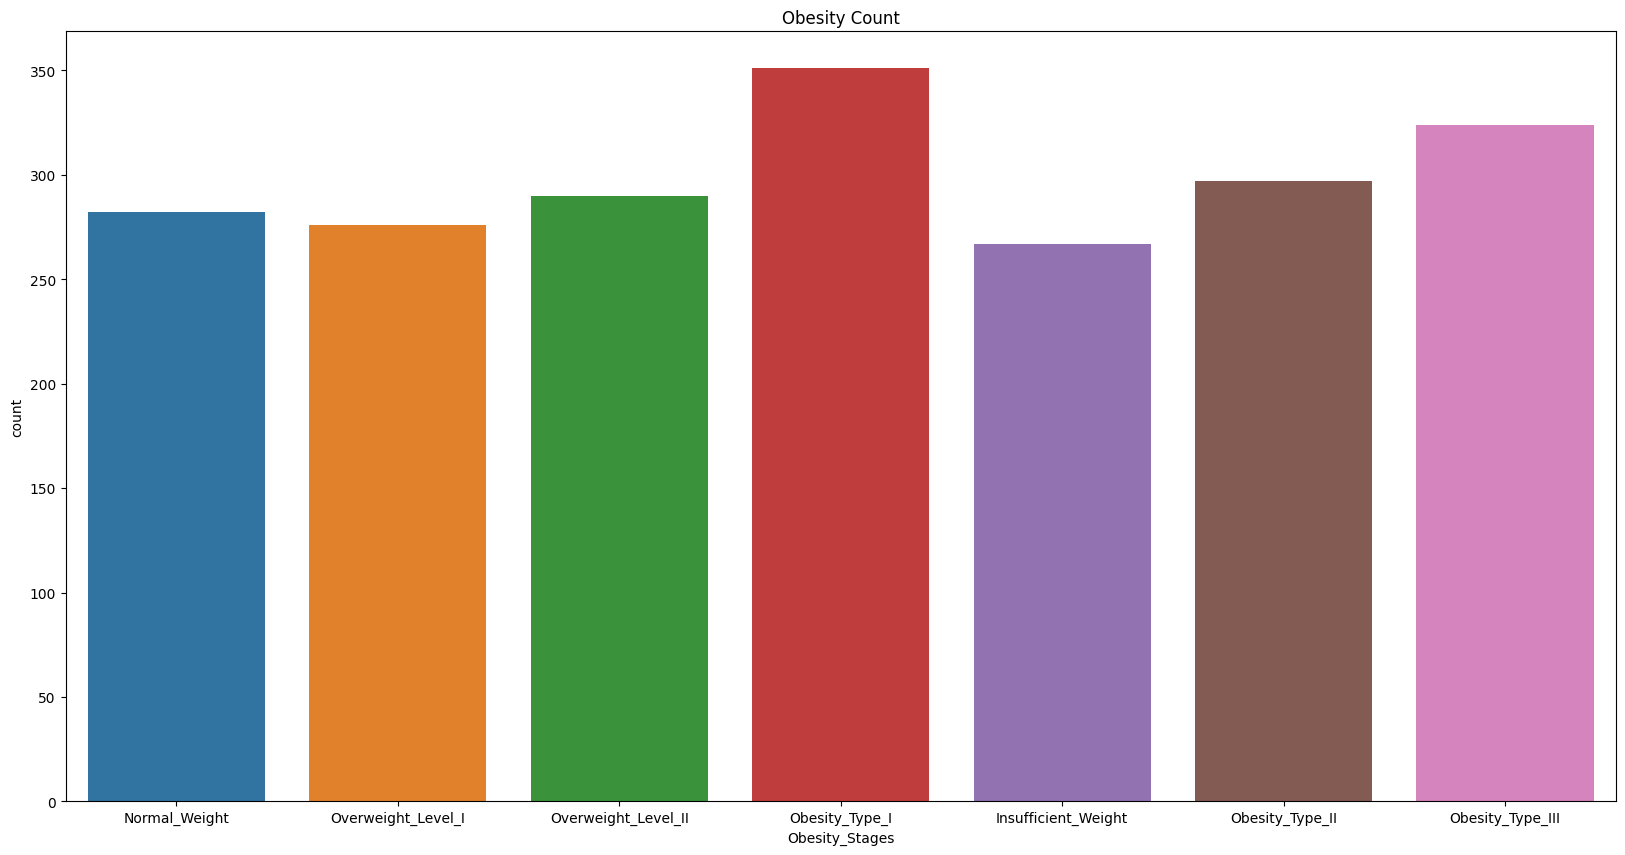

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
sns.countplot( x='Obesity_Stages', data= OB1)
plt.title('Obesity Count')

Text(0.5, 1.0, 'Gender v/s Obesity')

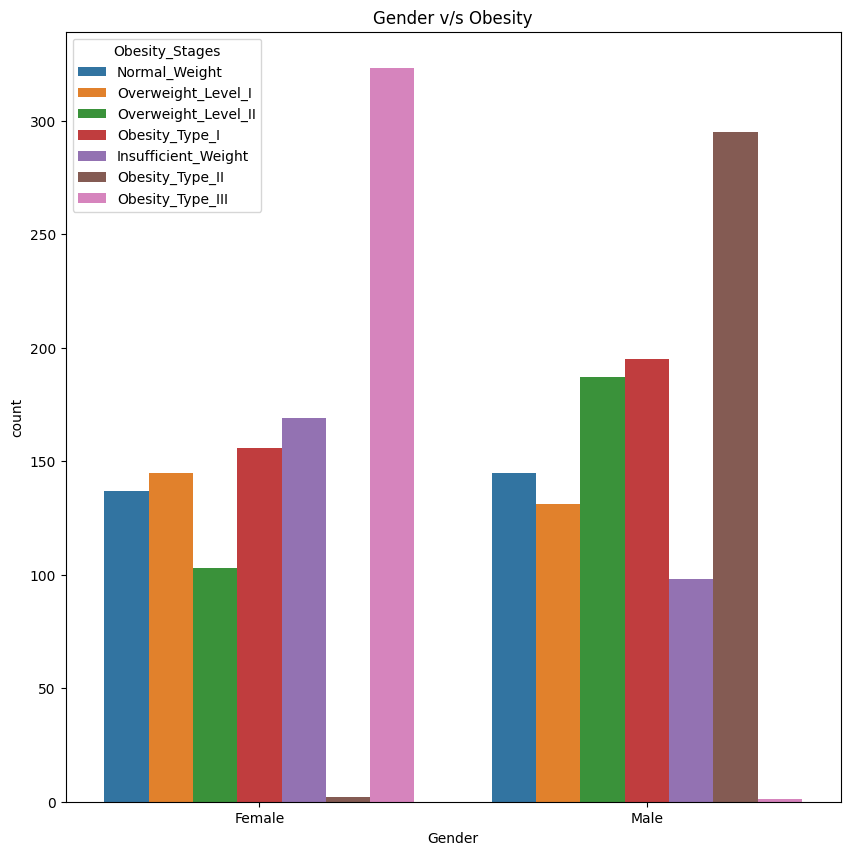

In [ ]:
plt.figure(figsize=(10,10))
sns.countplot( x='Gender',hue='Obesity_Stages', data= OB1)
plt.title('Gender v/s Obesity')

Text(0.5, 1.0, 'Family_history v/s Obesity')

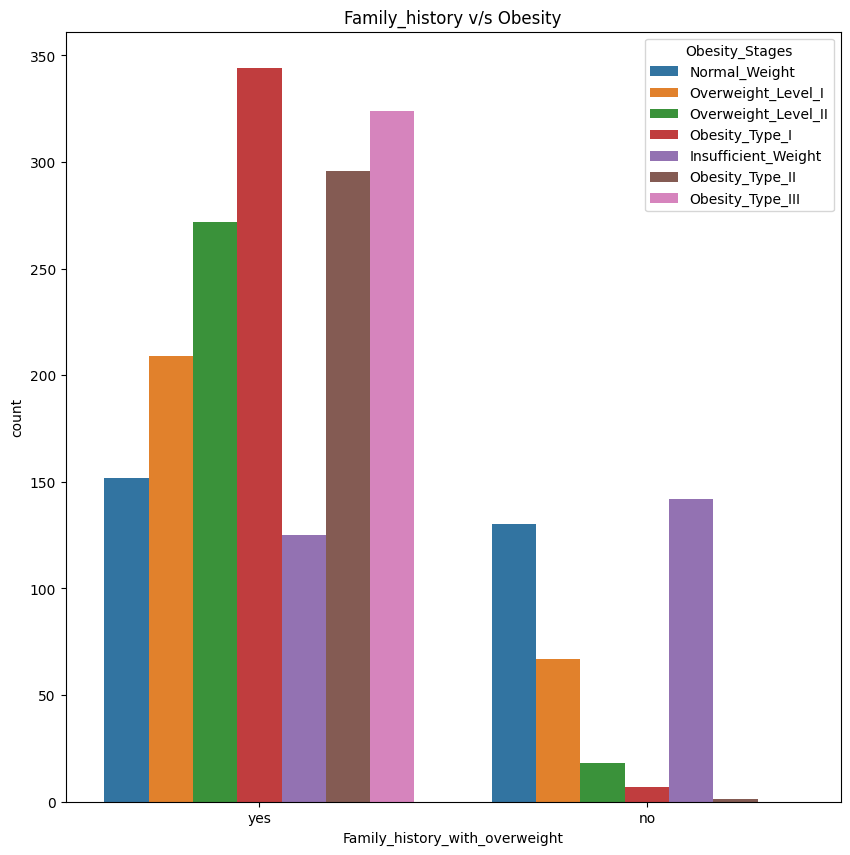

In [ ]:
plt.figure(figsize=(10,10))
sns.countplot( x='Family_history_with_overweight',hue='Obesity_Stages', data= OB1)
plt.title('Family_history v/s Obesity')

Text(0.5, 1.0, 'Consumption_of_food_between_meals v/s Obesity')

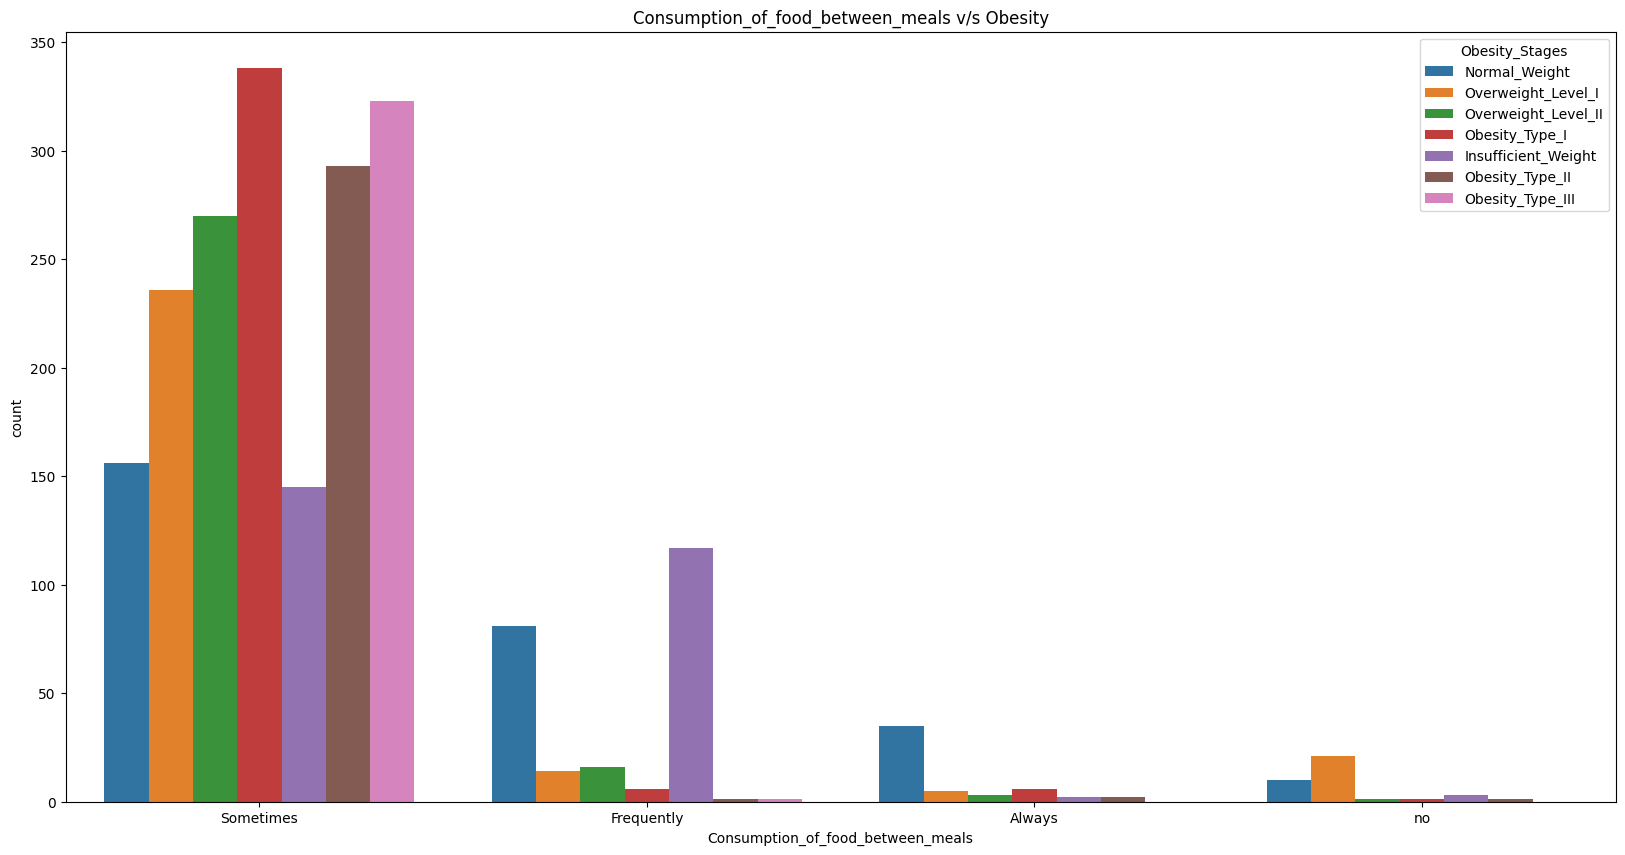

In [ ]:
plt.figure(figsize=(20,10))
sns.countplot( x='Consumption_of_food_between_meals',hue='Obesity_Stages', data= OB1)
plt.title('Consumption_of_food_between_meals v/s Obesity')

Text(0.5, 1.0, 'Smoker v/s Obesity')

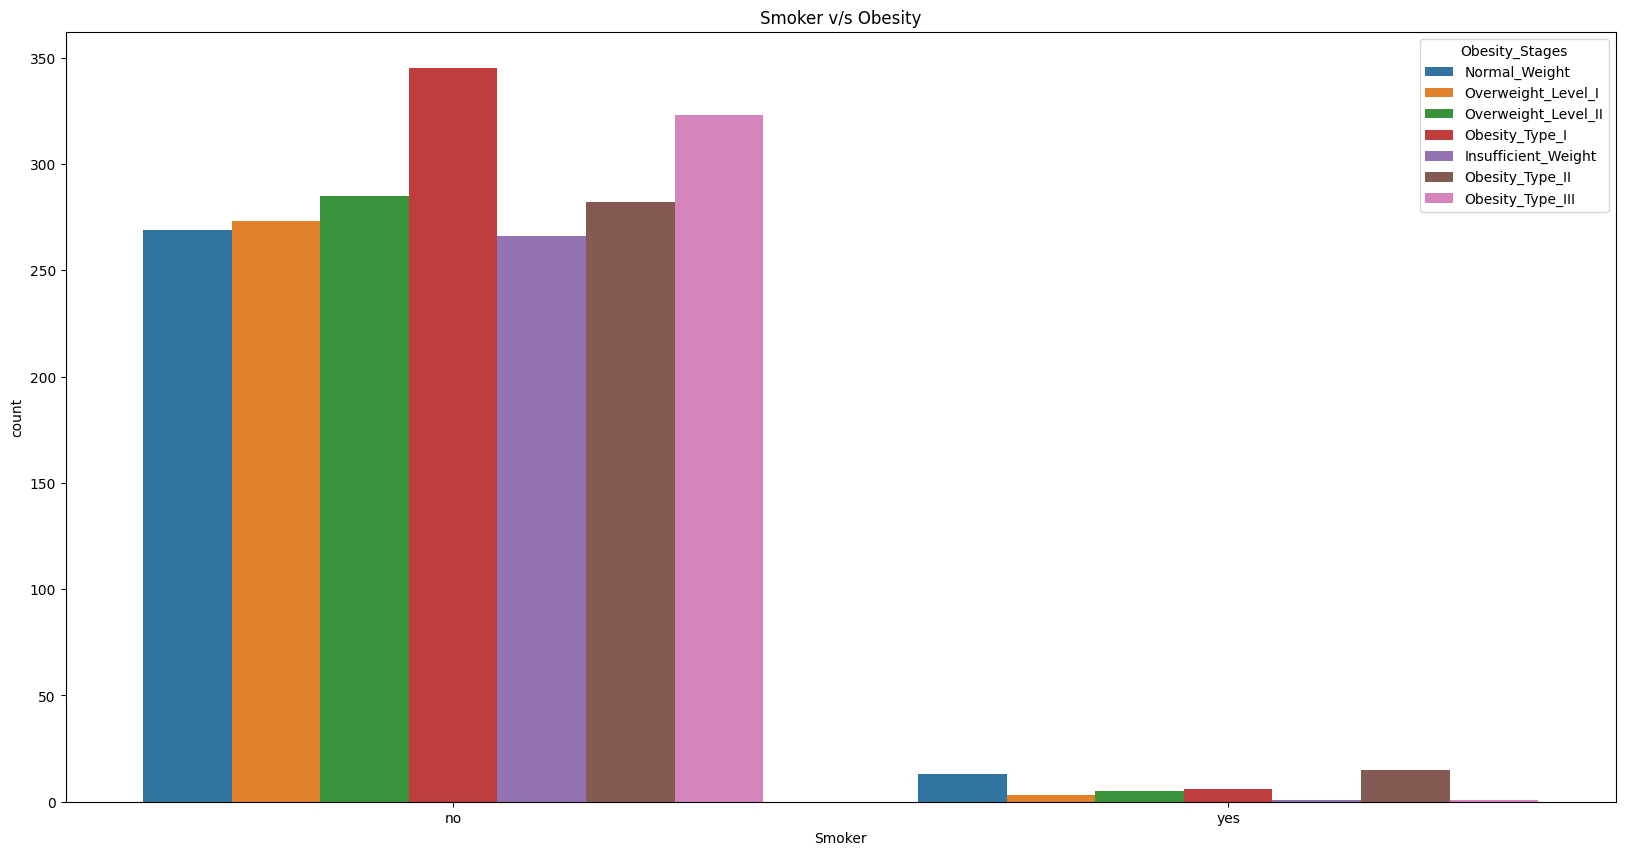

In [ ]:
plt.figure(figsize=(20,10))
sns.countplot( x='Smoker',hue='Obesity_Stages', data= OB1)
plt.title('Smoker v/s Obesity')

Text(0.5, 1.0, 'Monitor_Daily_Calories v/s Obesity')

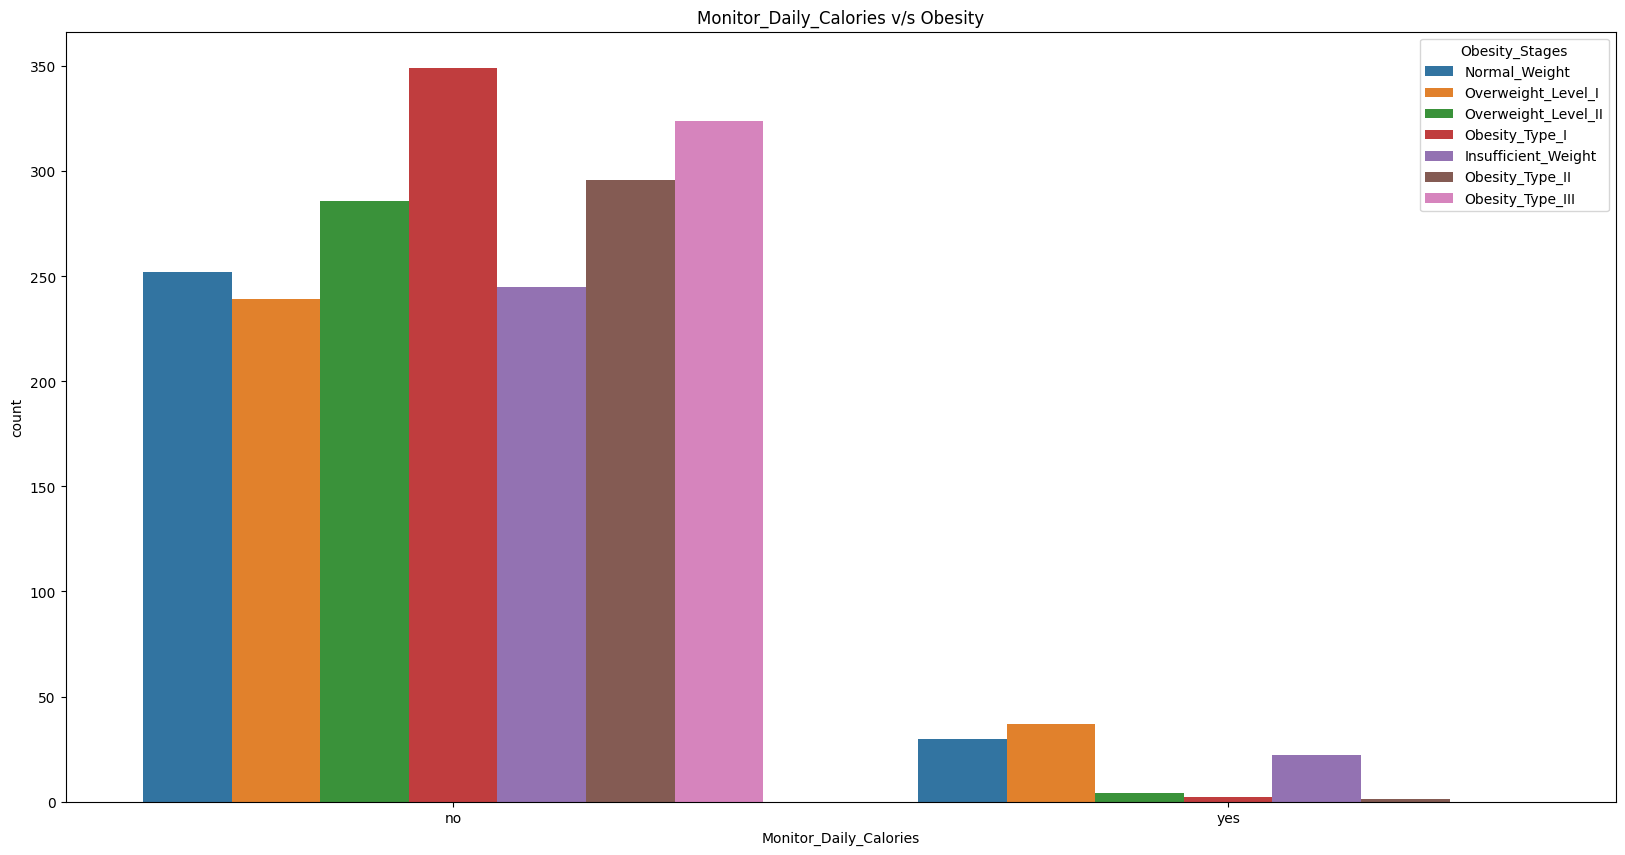

In [ ]:
plt.figure(figsize=(20,10))
sns.countplot( x='Monitor_Daily_Calories',hue='Obesity_Stages', data= OB1)
plt.title('Monitor_Daily_Calories v/s Obesity')

Text(0.5, 1.0, 'Physical_activity_frequency v/s Obesity')

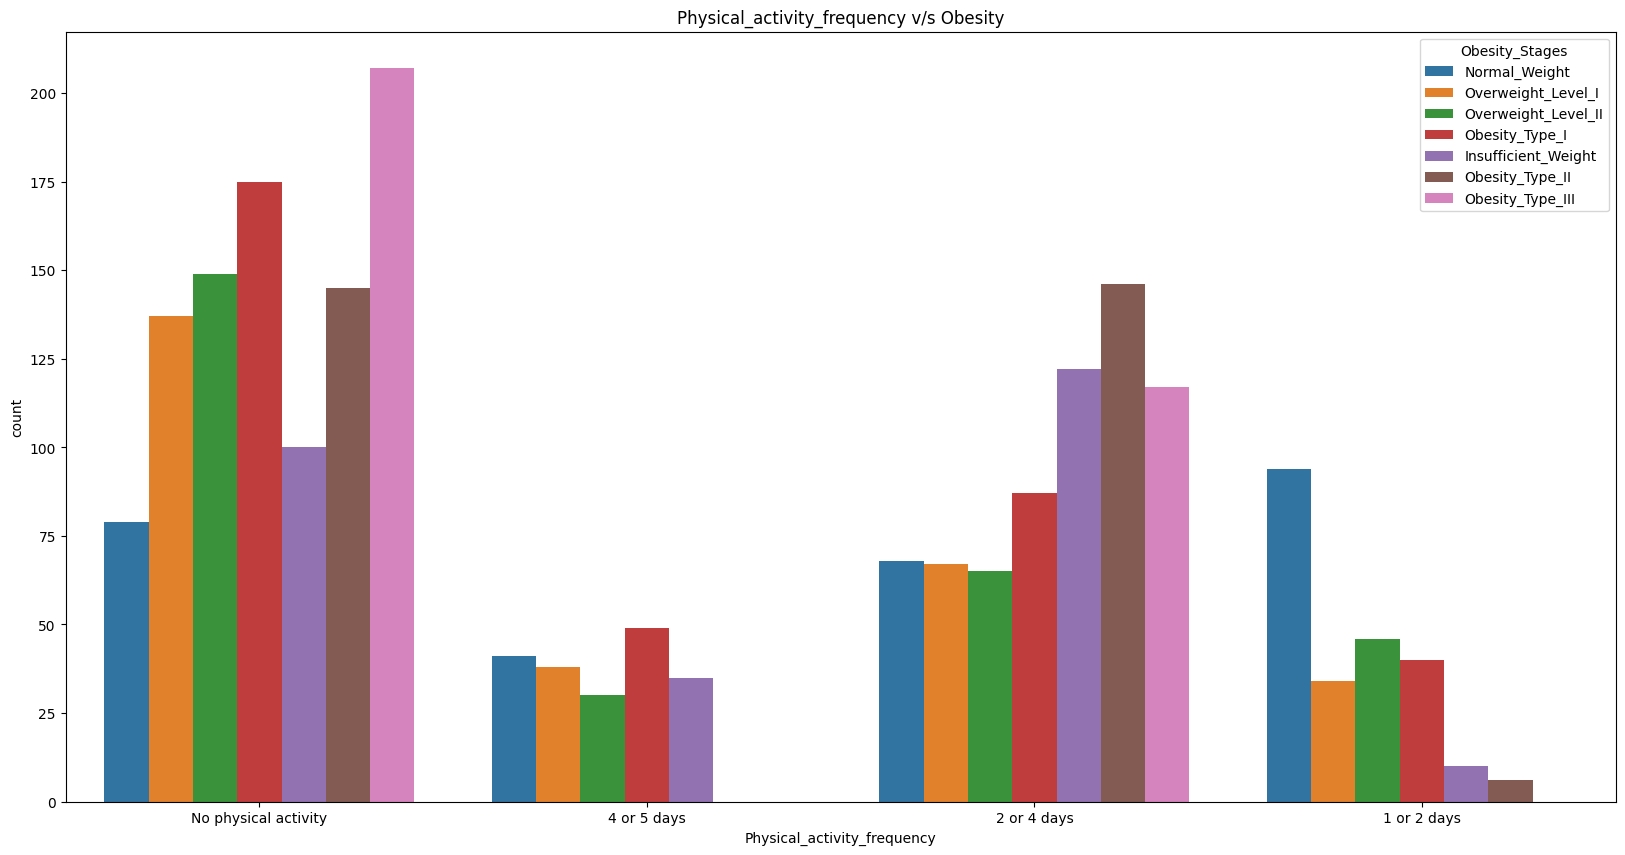

In [ ]:
plt.figure(figsize=(20,10))
sns.countplot( x='Physical_activity_frequency',hue='Obesity_Stages', data= OB1)
plt.title('Physical_activity_frequency v/s Obesity')

Text(0.5, 1.0, 'Alcohol v/s Obesity')

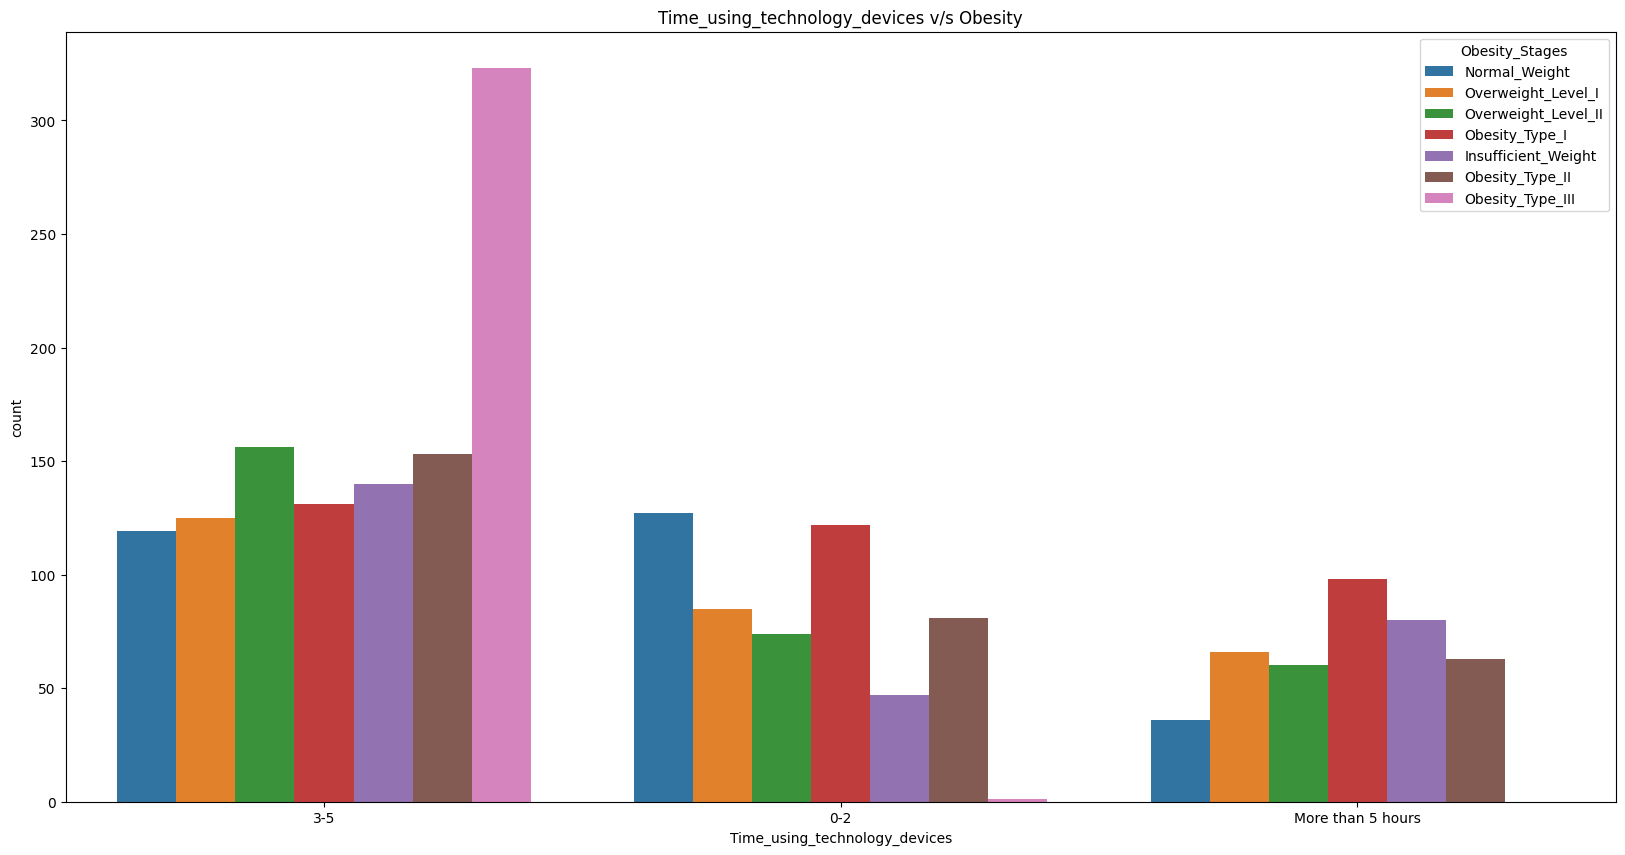

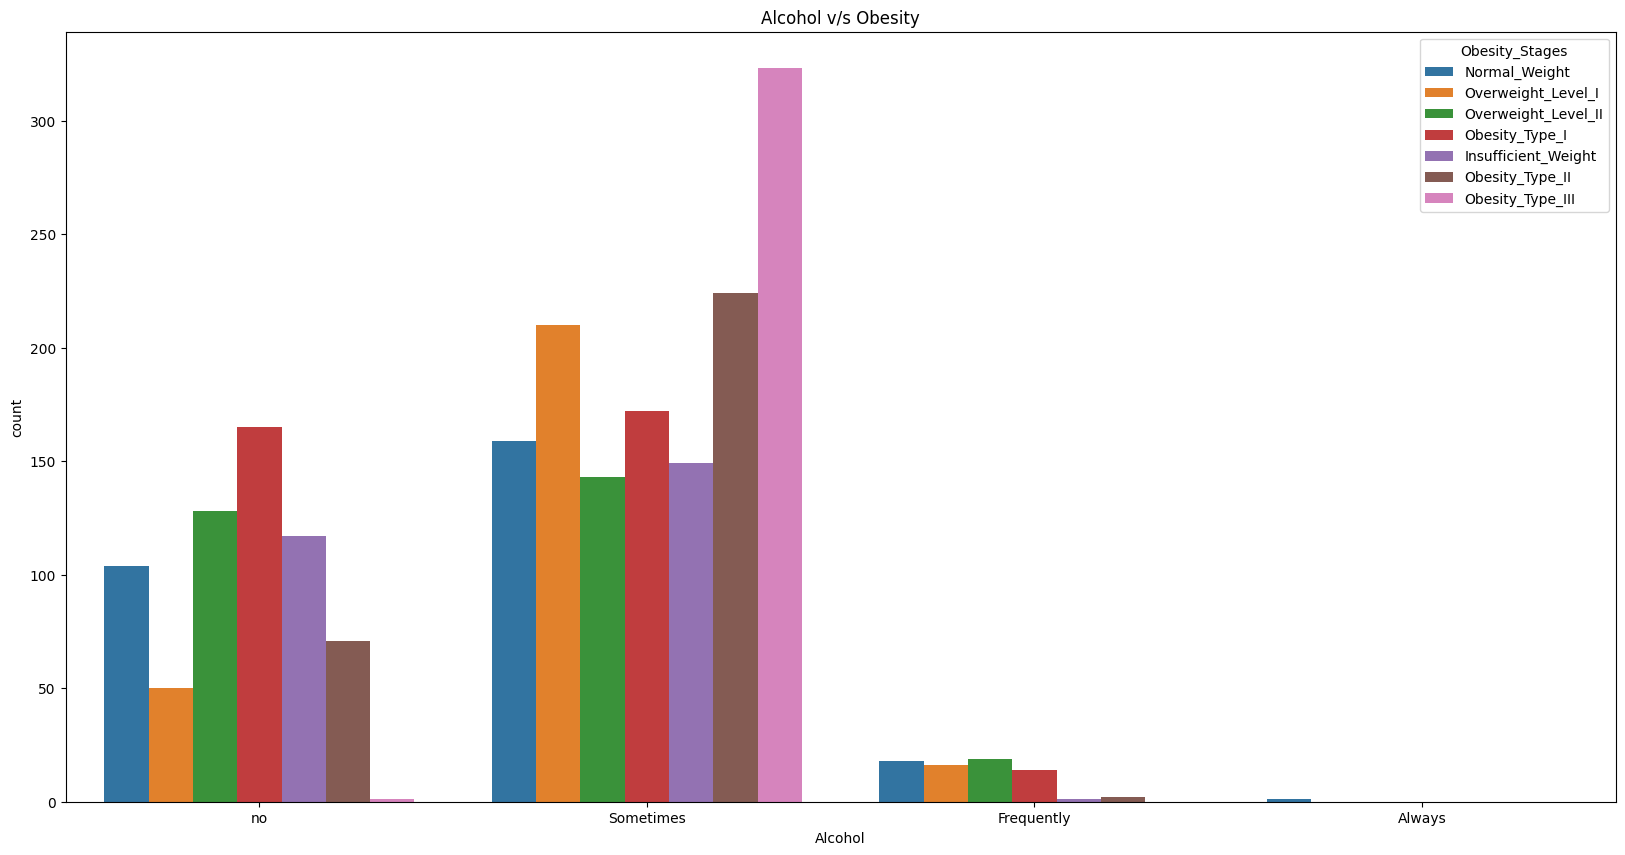

In [ ]:
plt.figure(figsize=(20,10))
sns.countplot( x='Time_using_technology_devices',hue='Obesity_Stages', data= OB1)
plt.title('Time_using_technology_devices v/s Obesity')
plt.figure(figsize=(20,10))
sns.countplot( x='Alcohol',hue='Obesity_Stages', data= OB1)
plt.title('Alcohol v/s Obesity')

Text(0.5, 1.0, 'Transportation used v/s Obesity')

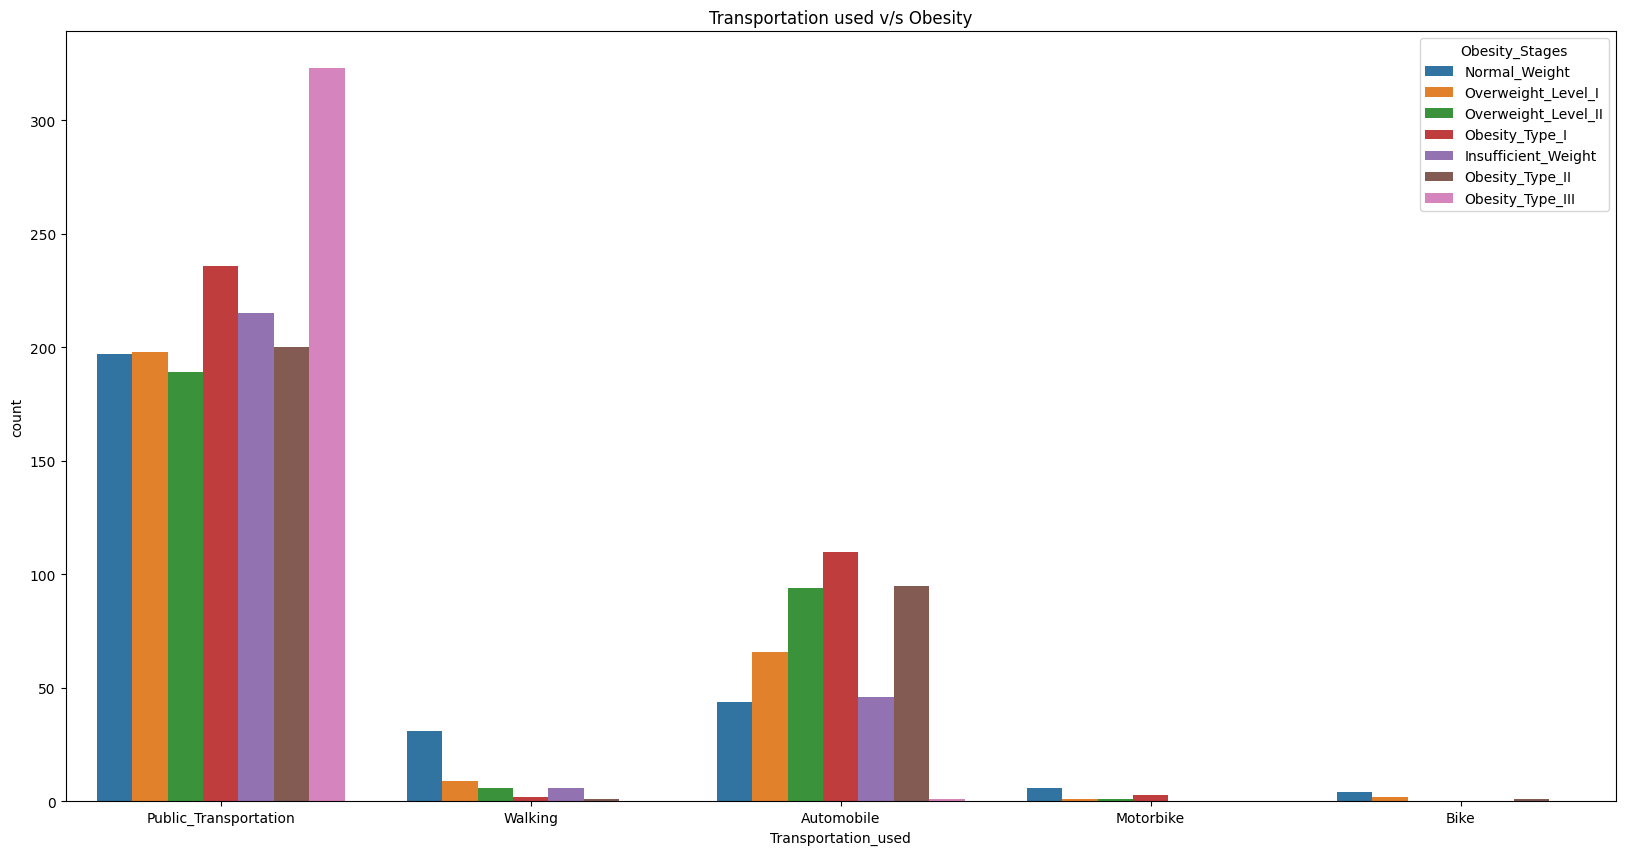

In [ ]:
plt.figure(figsize=(20,10))
sns.countplot( x='Transportation_used',hue='Obesity_Stages', data= OB1)
plt.title('Transportation used v/s Obesity')

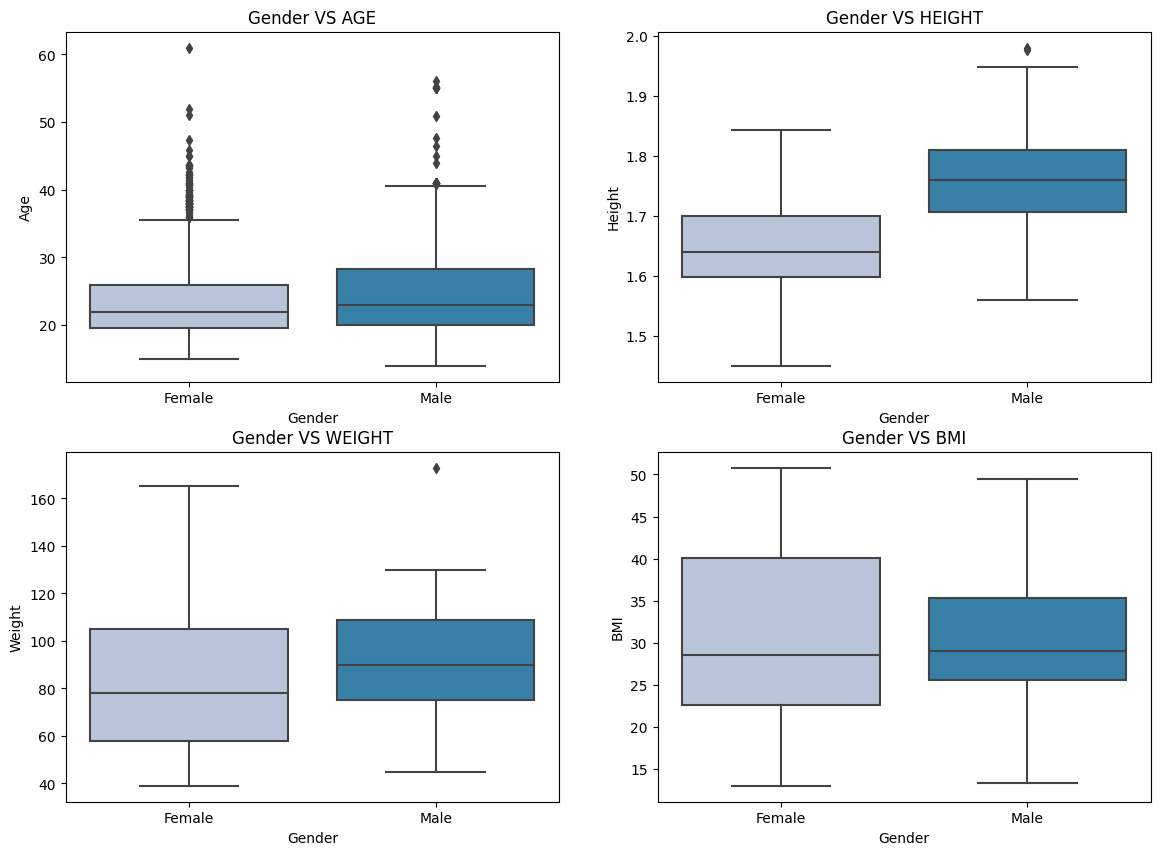

In [ ]:
fig1, axes1 =plt.subplots(2,2,figsize=(14, 10))
list_col=  OB1.select_dtypes([np.number]).columns
for i in range(len(list_col)):
    row=i//2
    col=i%2
    ax=axes1[row,col]
    sns.boxplot(y=OB1[list_col[i]],x=OB1['Gender'],ax=ax,palette="PuBu", orient='v').set(title='Gender VS '+ list_col[i].upper())

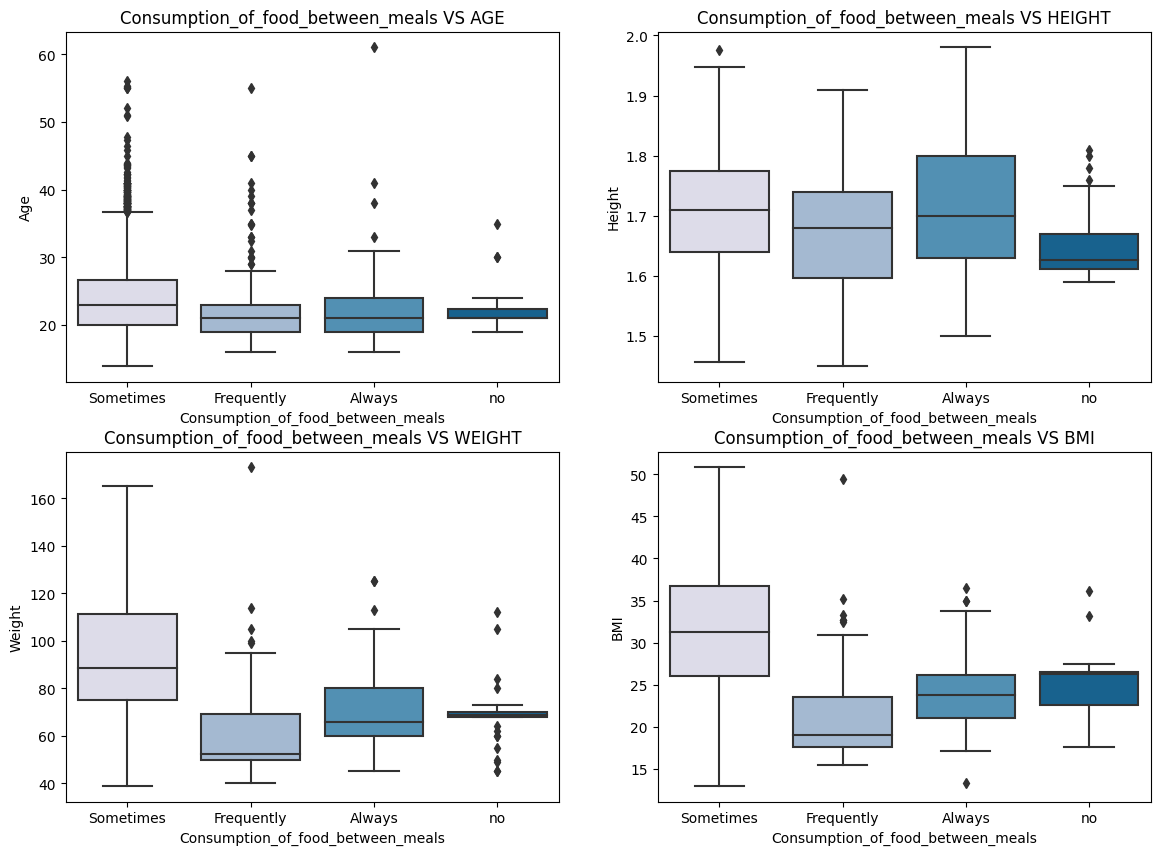

In [ ]:
fig1, axes1 =plt.subplots(2,2,figsize=(14, 10))
list_col=  OB1.select_dtypes([np.number]).columns
for i in range(len(list_col)):
    row=i//2
    col=i%2
    ax=axes1[row,col]
    sns.boxplot(y=OB1[list_col[i]],x=OB1['Consumption_of_food_between_meals'],ax=ax,palette="PuBu", orient='v').set(title='Consumption_of_food_between_meals VS '+ list_col[i].upper())

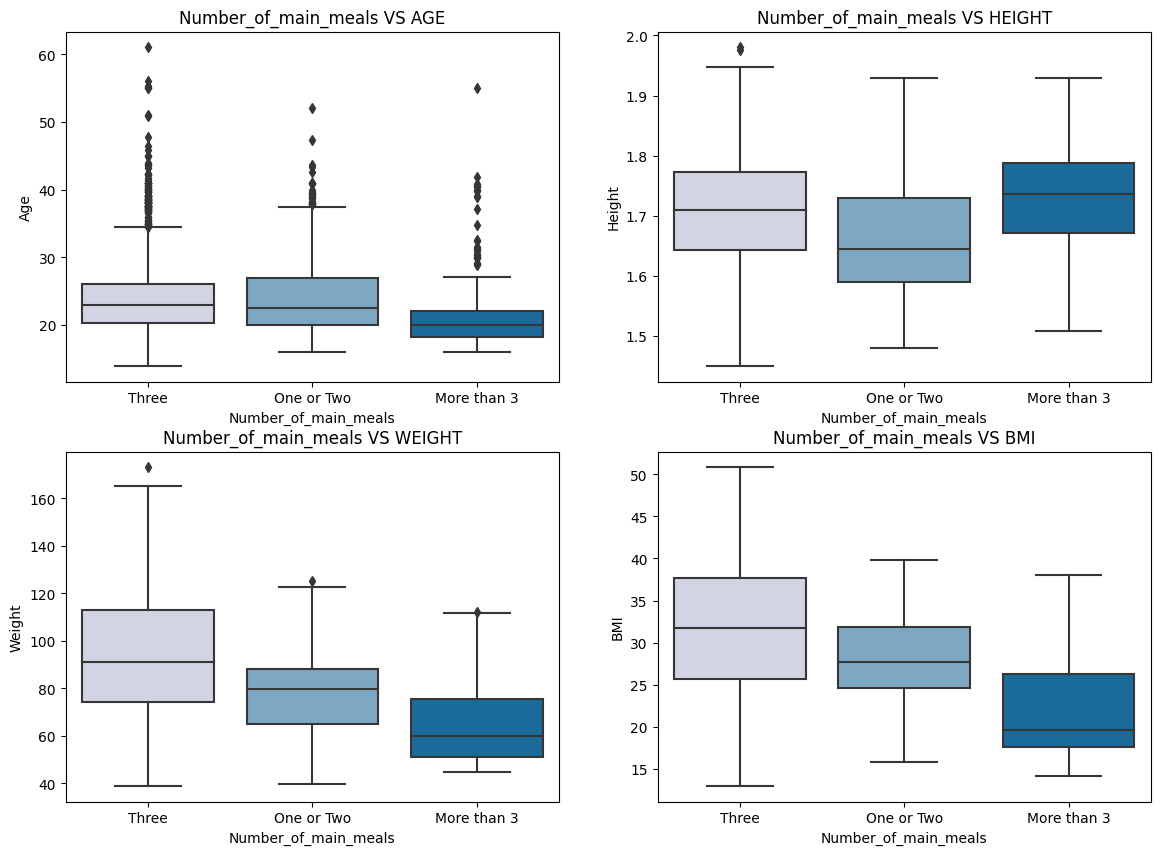

In [ ]:
fig1, axes1 =plt.subplots(2,2,figsize=(14, 10))
list_col=  OB1.select_dtypes([np.number]).columns
for i in range(len(list_col)):
    row=i//2
    col=i%2
    ax=axes1[row,col]
    sns.boxplot(y=OB1[list_col[i]],x=OB1['Number_of_main_meals'],ax=ax,palette="PuBu", orient='v').set(title='Number_of_main_meals VS '+ list_col[i].upper())

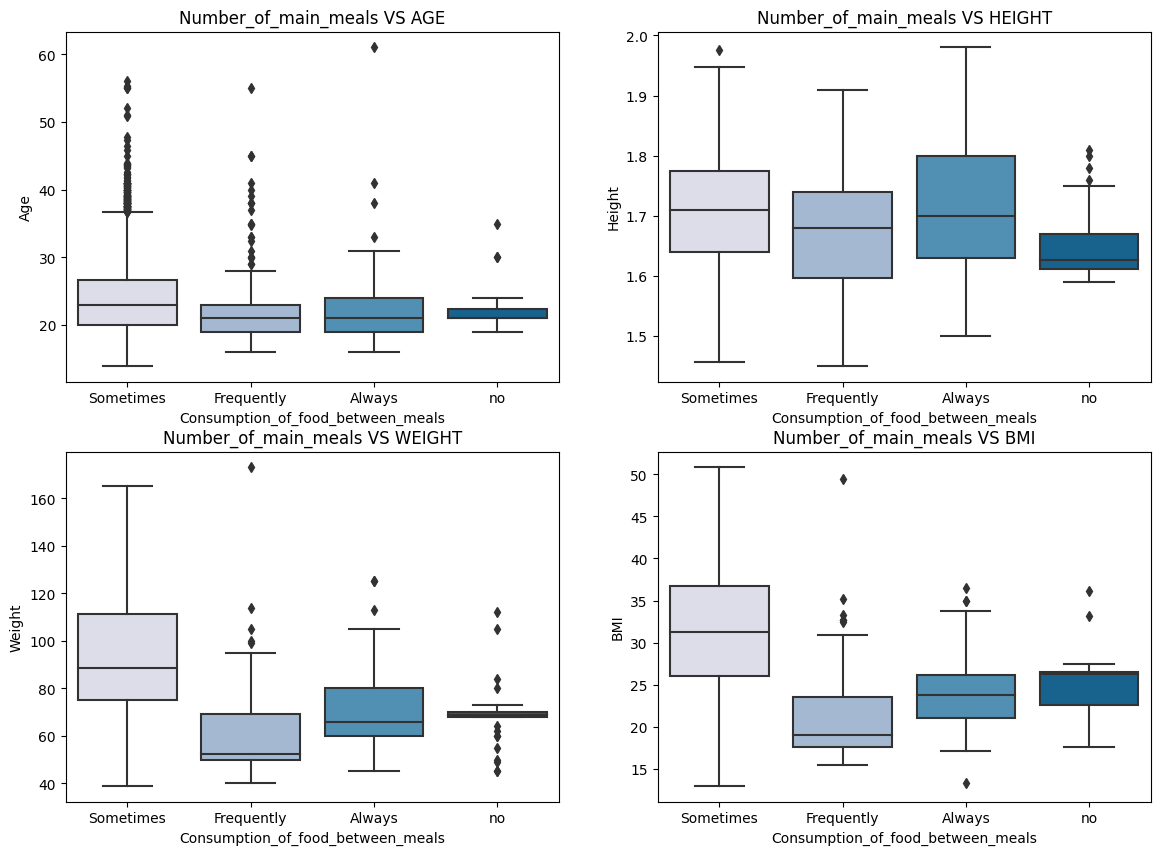

In [ ]:
fig1, axes1 =plt.subplots(2,2,figsize=(14, 10))
list_col=  OB1.select_dtypes([np.number]).columns
for i in range(len(list_col)):
    row=i//2
    col=i%2
    ax=axes1[row,col]
    sns.boxplot(y=OB1[list_col[i]],x=OB1['Consumption_of_food_between_meals'],ax=ax,palette="PuBu", orient='v').set(title='Number_of_main_meals VS '+ list_col[i].upper())

Text(0.5, 1.0, 'BMI Distribution With Age and Gender')

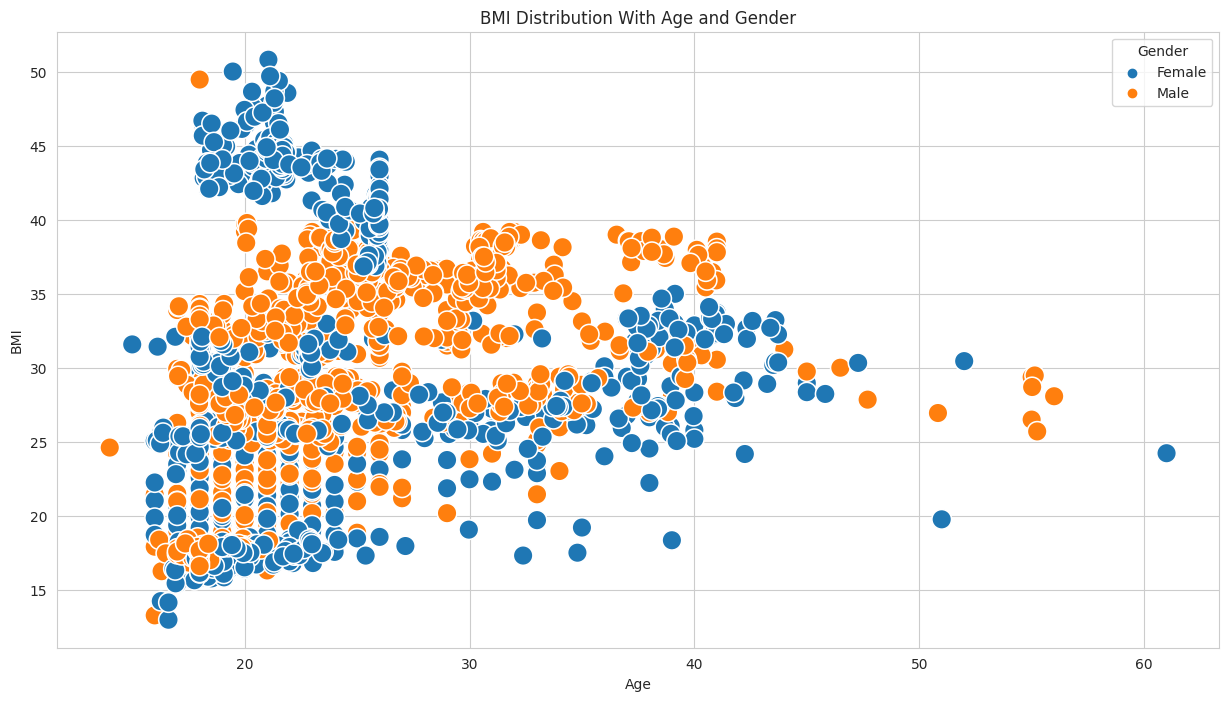

In [ ]:
plt.figure(figsize=(15,8))
sns.scatterplot(data=OB1,x='Age',y='BMI',hue='Gender',s=200)
plt.title('BMI Distribution With Age and Gender') 

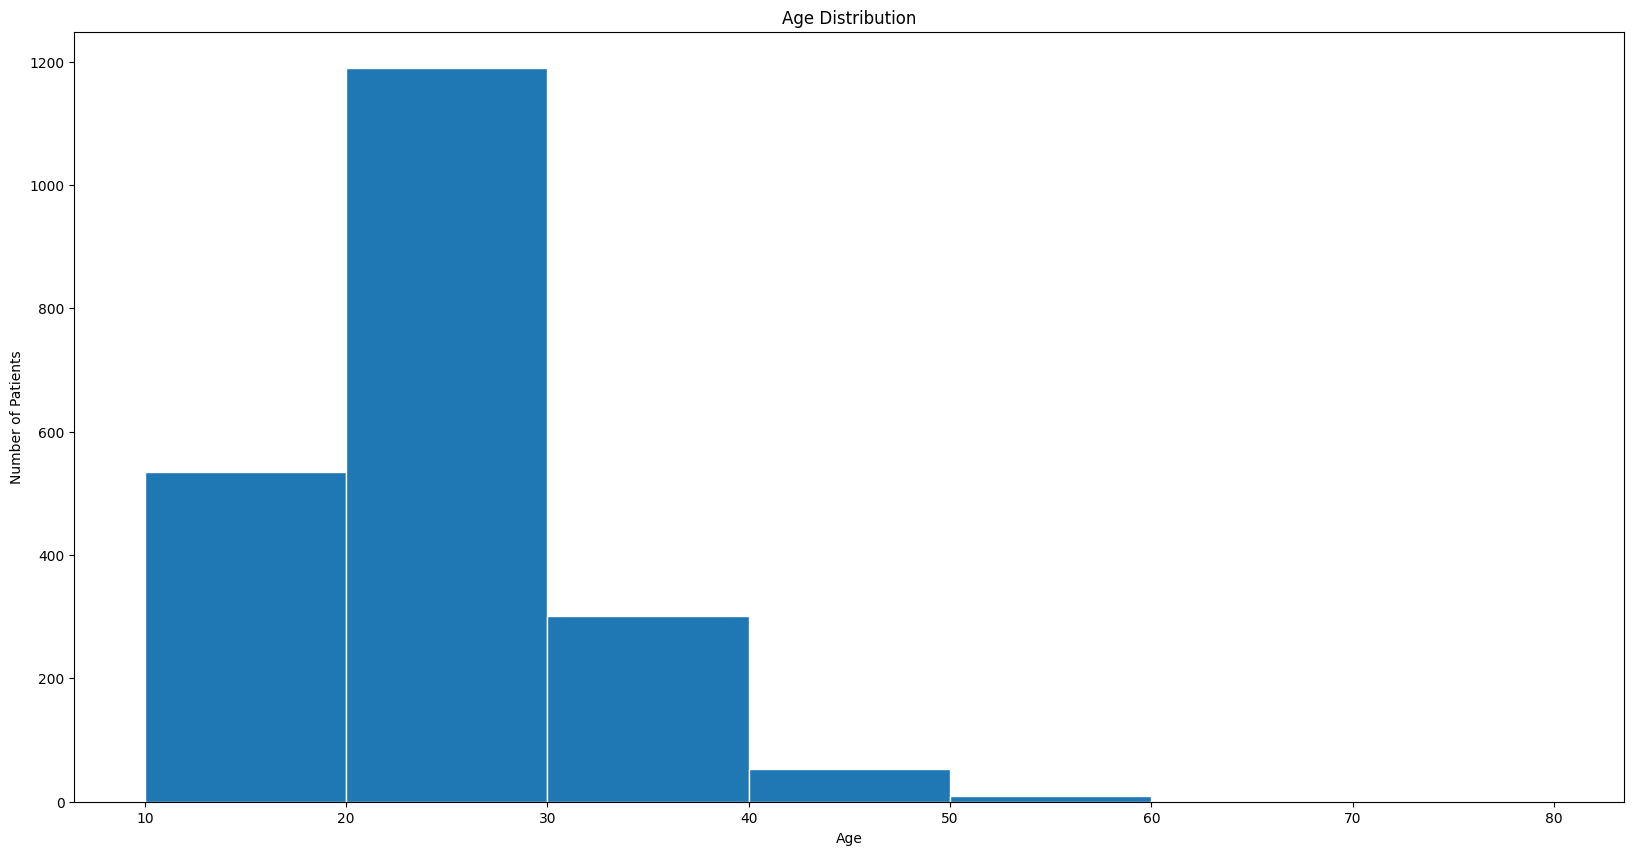

Skewness: 1.5143049022515678
Kurtosis: 2.7676901776823444


In [ ]:
fig, ax = plt.subplots(figsize =(20, 10))
ax.hist(OB1.Age, bins = [10,20,30,40,50,60,80],edgecolor='white')
plt.xlabel("Age")
plt.ylabel("Number of Patients")
plt.title('Age Distribution') 
plt.show()
print(f"Skewness: {OB2['Age'].skew()}")
print(f"Kurtosis: {OB2['Age'].kurt()}")

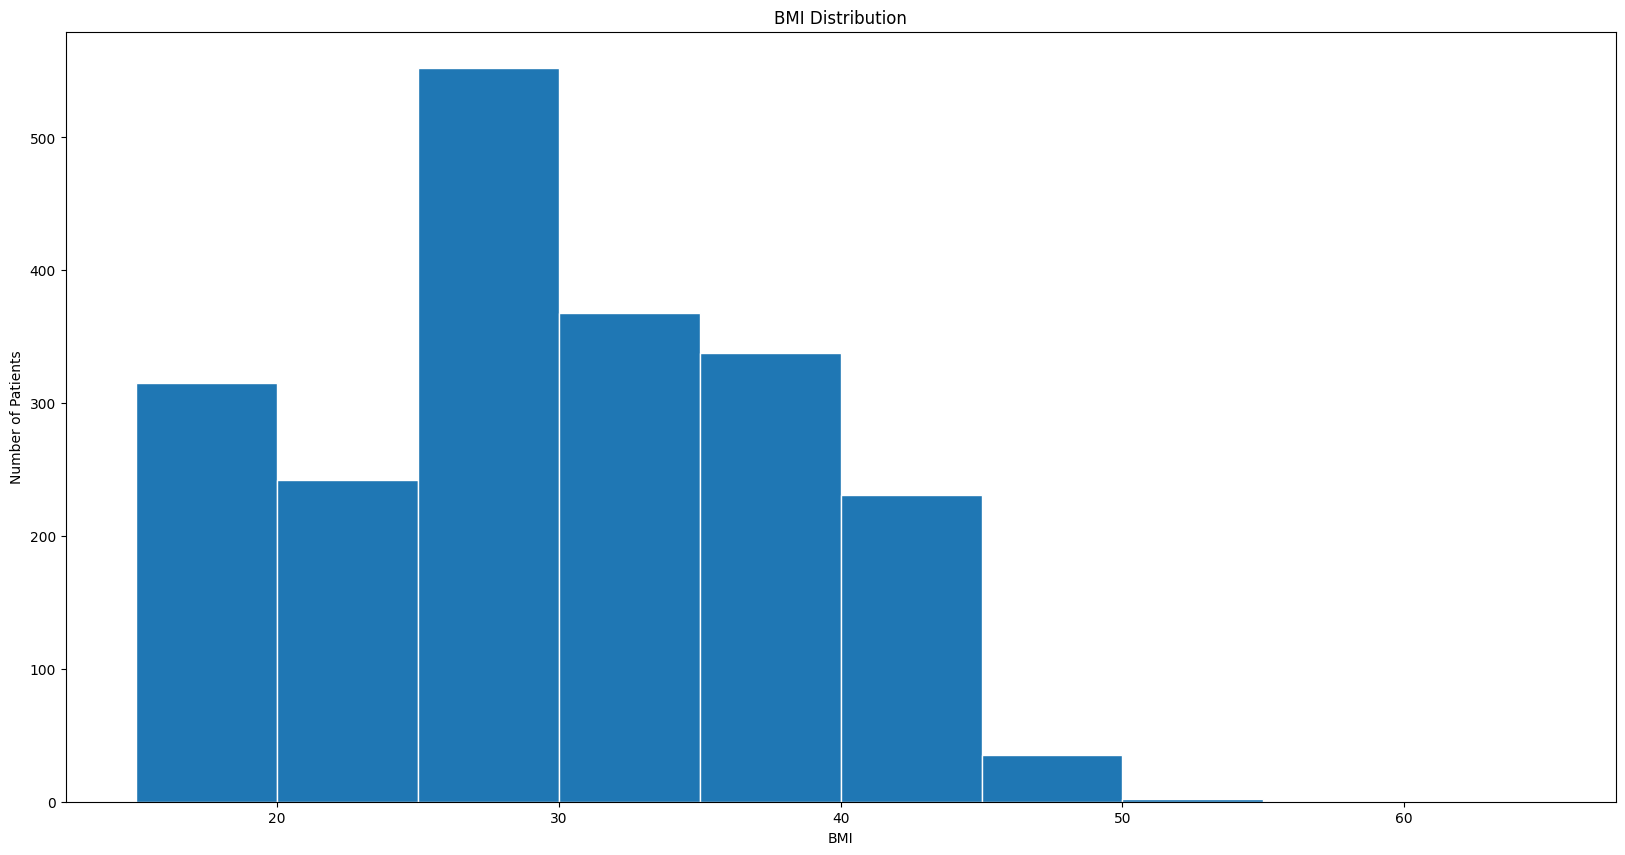

Skewness: 0.14017560249665456
Kurtosis: -0.8163641199983109


In [ ]:
fig, ax = plt.subplots(figsize =(20, 10))
ax.hist(OB1.BMI, bins = [15,20,25,30,35,40,45,50,55,60,65],edgecolor='white')
plt.xlabel("BMI")
plt.ylabel("Number of Patients")
plt.title('BMI Distribution') 
plt.show()
print(f"Skewness: {OB2['BMI'].skew()}")
print(f"Kurtosis: {OB2['BMI'].kurt()}") 

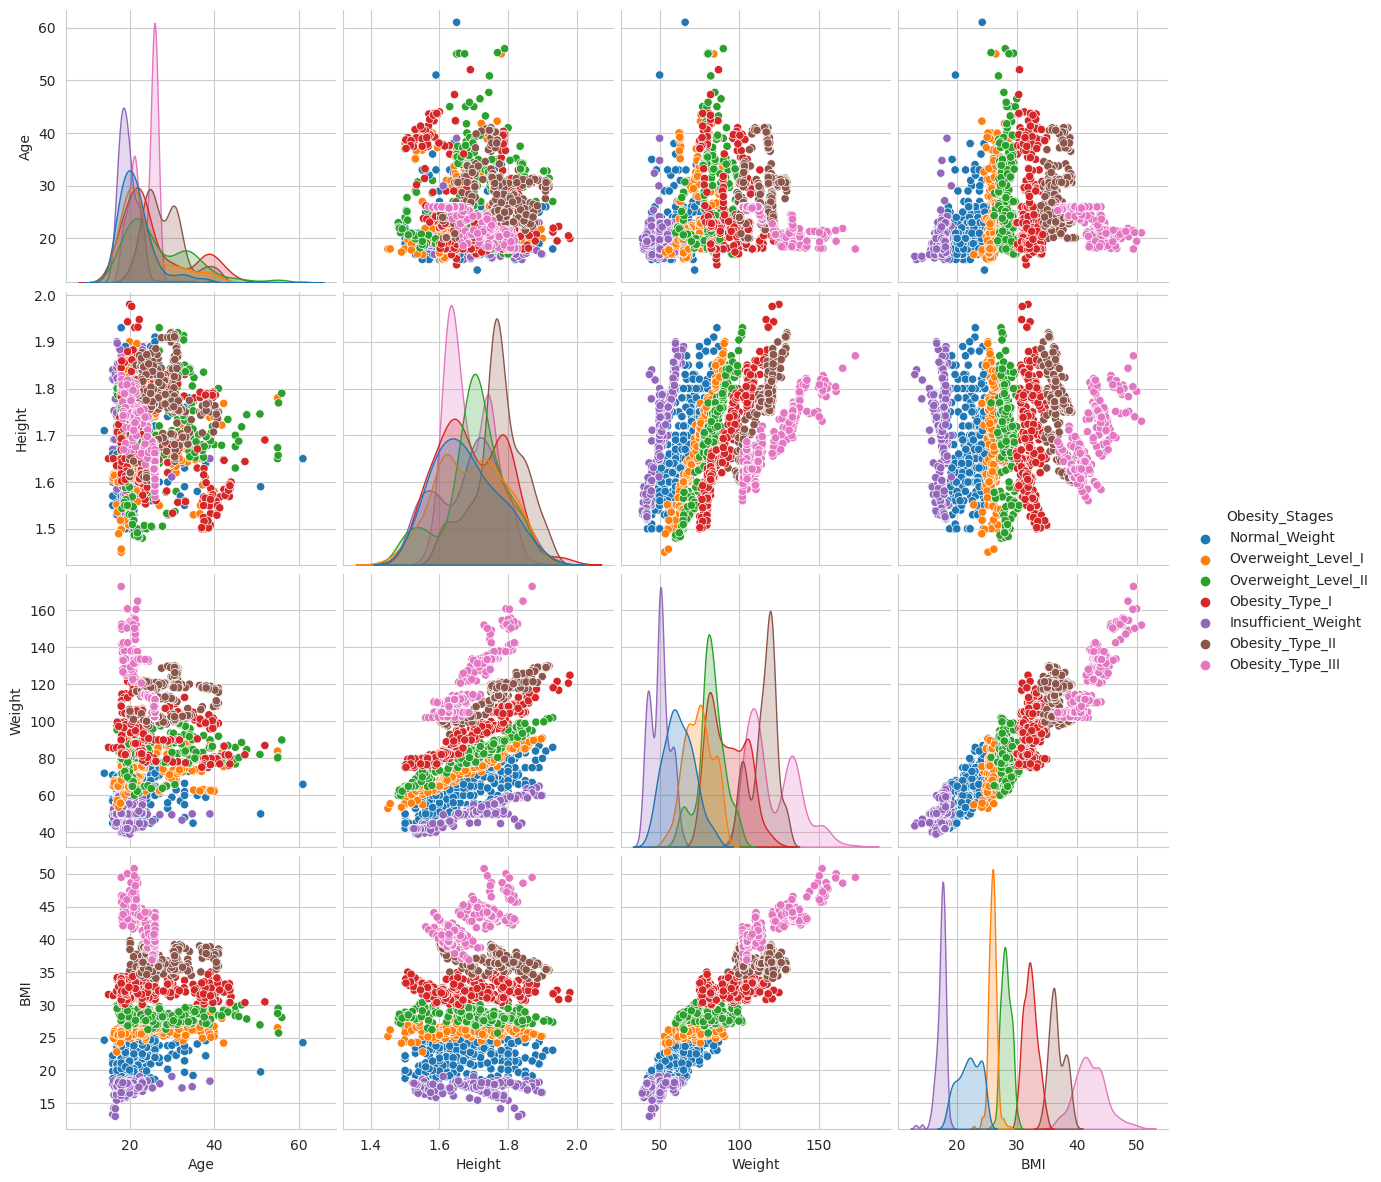

In [ ]:
sns.set_style("whitegrid");
sns.pairplot(OB1, hue="Obesity_Stages", height=3);
plt.show()

# Correlation testing

In [ ]:
OBC=pd.get_dummies(OB2,columns=['Gender','Family_history_with_overweight','High_caloric_food_intake', 'Frequency_of_consumption_of_vegetables', 'Number_of_main_meals','Consumption_of_food_between_meals','Smoker', 'Daily_Water_Intake','Monitor_Daily_Calories', 'Physical_activity_frequency','Time_using_technology_devices','Alcohol','Transportation_used'])

In [ ]:
correlation =OB2.corr(method = 'spearman')
correlation

,Gender,Age,Height,Weight,Family_history_with_overweight,High_caloric_food_intake,Frequency_of_consumption_of_vegetables,Number_of_main_meals,Consumption_of_food_between_meals,Smoker,Daily_Water_Intake,Monitor_Daily_Calories,Physical_activity_frequency,Time_using_technology_devices,Alcohol,Transportation_used,Obesity_Stages,BMI
Gender,1.000000,0.070686,0.637650,0.205888,0.113492,0.061220,-0.210775,0.083725,-0.096247,0.045501,0.083384,-0.102435,0.160292,0.040744,-0.015926,0.128641,0.011105,-0.020723
Age,0.070686,1.000000,-0.009733,0.350296,0.267832,0.093720,0.141419,-0.101402,-0.130684,0.077645,0.092135,-0.166980,-0.200030,-0.222841,0.098204,0.470060,0.286976,0.395308
Height,0.637650,-0.009733,1.000000,0.456129,0.226771,0.176358,0.003308,0.209141,-0.073091,0.044152,0.256185,-0.134776,0.286752,0.084029,0.142984,0.075390,0.043696,0.122460
Weight,0.205888,0.350296,0.456129,1.000000,0.503564,0.285160,0.223692,-0.033403,-0.339482,0.021636,0.347917,-0.211665,-0.037819,0.048091,0.217162,0.017491,0.404773,0.929184
Family_history_with_overweight,0.113492,0.267832,0.226771,0.503564,1.000000,0.214329,0.075734,-0.008329,-0.227335,0.014885,0.239414,-0.193947,-0.043852,0.110513,-0.027594,0.094619,0.331463,0.497682
High_caloric_food_intake,0.061220,0.093720,0.176358,0.285160,0.214329,1.000000,0.032924,-0.013109,-0.160836,-0.050713,0.111939,-0.191277,-0.096913,0.171626,0.097141,0.090430,0.045603,0.251266
Frequency_of_consumption_of_vegetables,-0.210775,0.141419,0.003308,0.223692,0.075734,0.032924,1.000000,0.057398,-0.008134,-0.004104,0.140573,0.027001,0.054408,-0.038301,0.081441,0.034818,0.042830,0.252217
Number_of_main_meals,0.083725,-0.101402,0.209141,-0.033403,-0.008329,-0.013109,0.057398,1.000000,0.085714,-0.005412,0.080720,-0.022004,0.146374,0.053805,0.038448,0.042577,-0.107349,-0.095856
Consumption_of_food_between_meals,-0.096247,-0.130684,-0.073091,-0.339482,-0.227335,-0.160836,-0.008134,0.085714,1.000000,0.052427,-0.211525,0.106639,0.034722,-0.067795,-0.068249,-0.073112,-0.345662,-0.360495
Smoker,0.045501,0.077645,0.044152,0.021636,0.014885,-0.050713,-0.004104,-0.005412,0.052427,1.000000,-0.063145,0.047384,-0.007197,-0.007942,0.076774,0.008981,-0.024372,0.000855


In [ ]:
cor1 = correlation['BMI'].sort_values(ascending=False)
cor1 = cor1.drop(['BMI'])
cor1.to_frame()

,BMI
Weight,0.929184
Family_history_with_overweight,0.497682
Obesity_Stages,0.423158
Age,0.395308
Daily_Water_Intake,0.284489
Frequency_of_consumption_of_vegetables,0.252217
High_caloric_food_intake,0.251266
Alcohol,0.164947
Height,0.122460
Time_using_technology_devices,0.030549


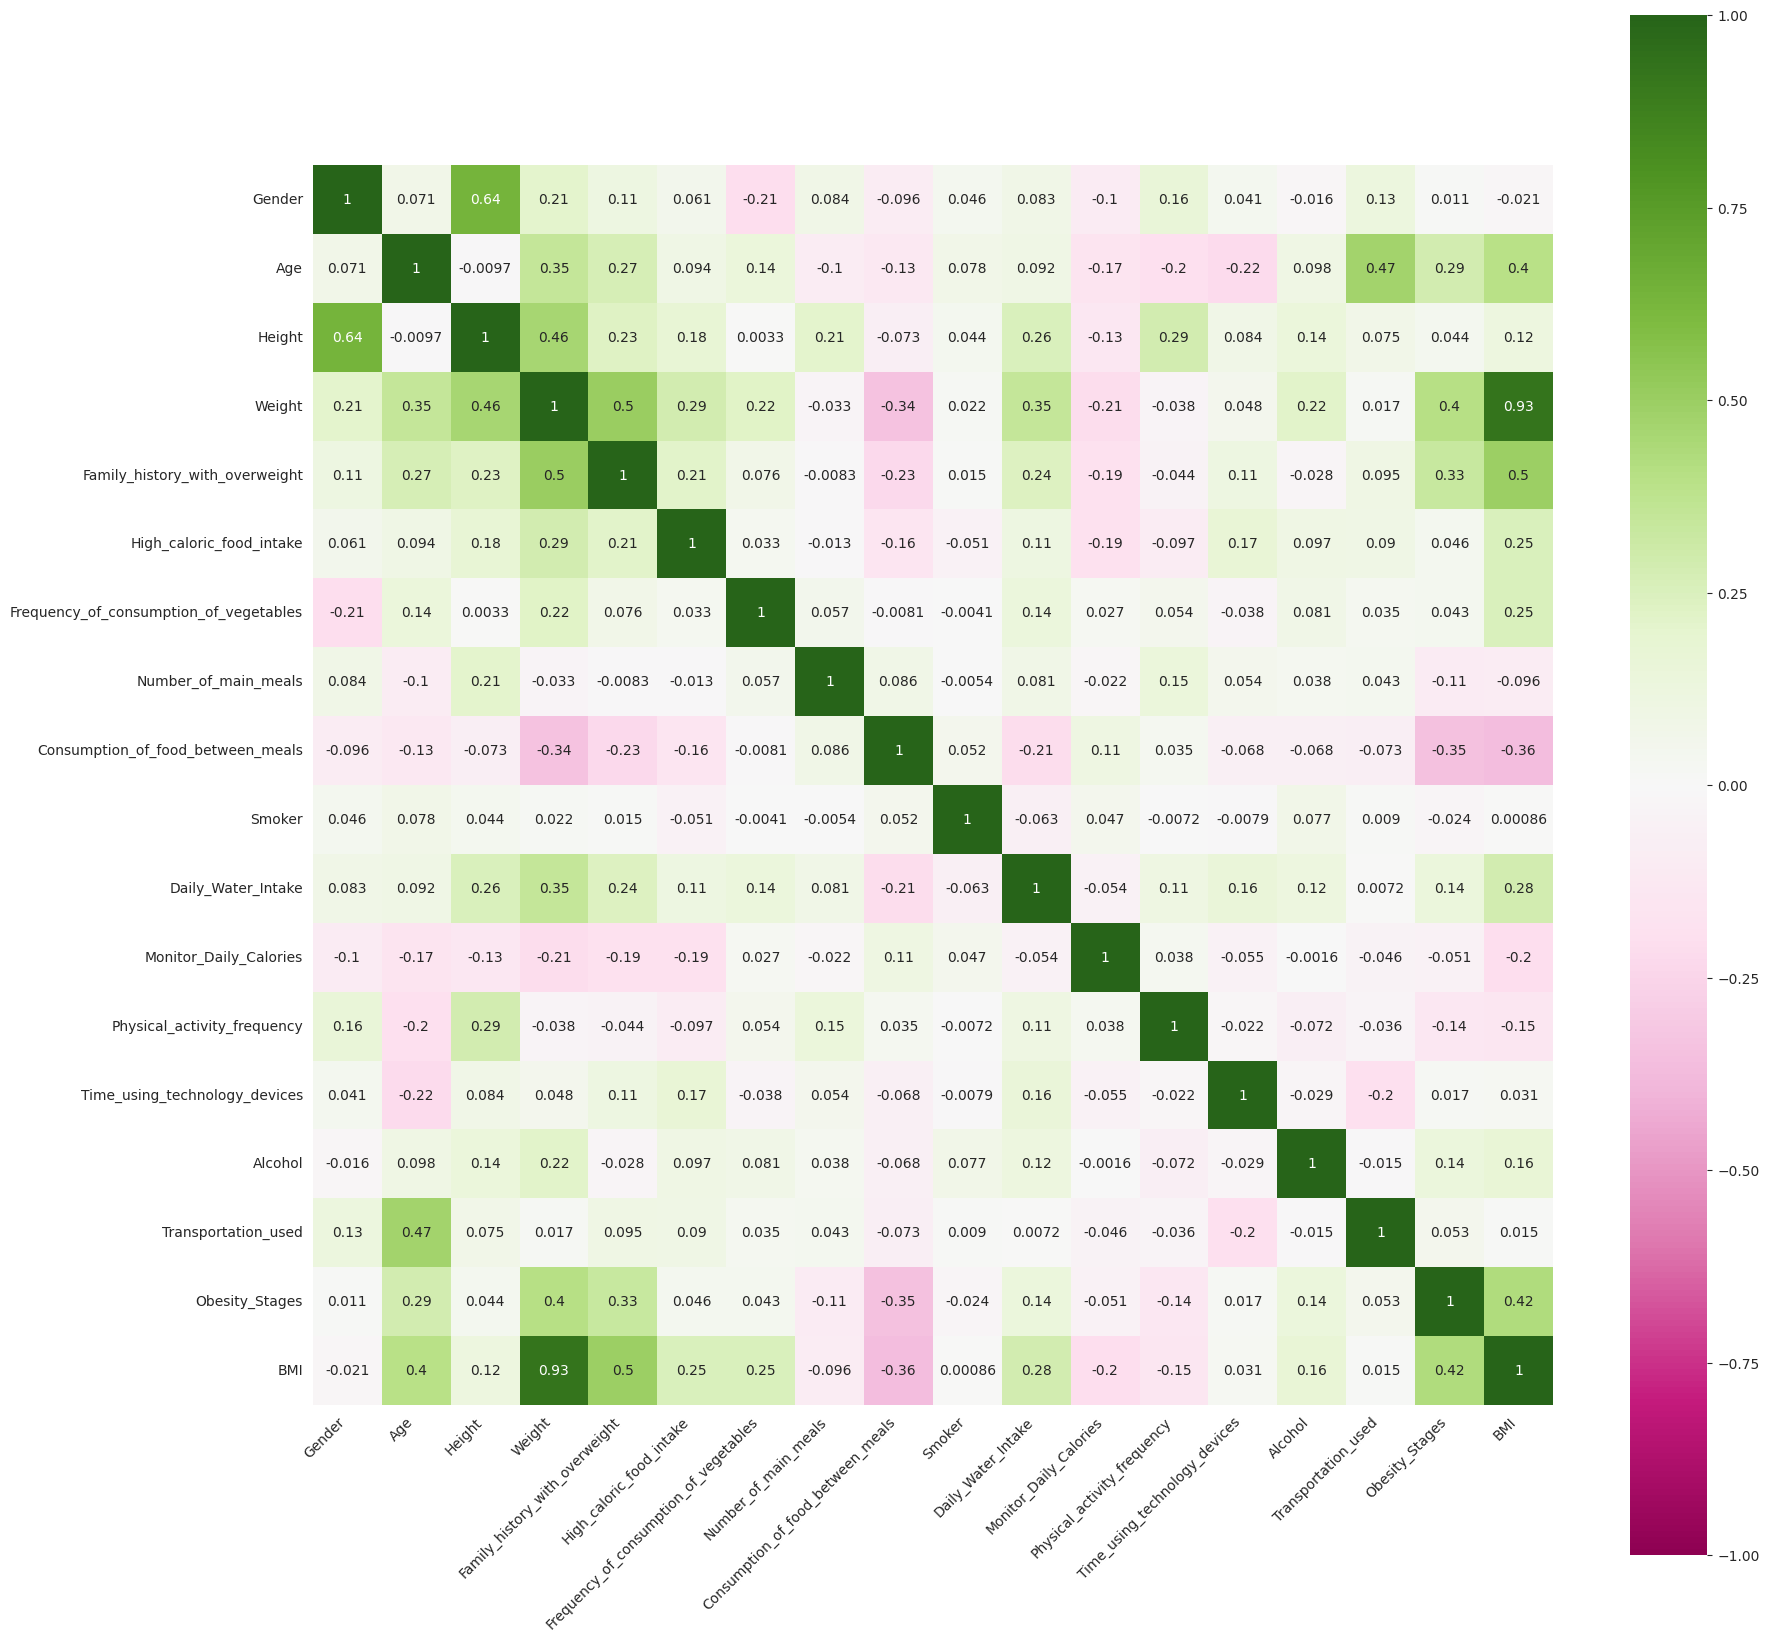

In [ ]:
plt.figure(figsize=(20,20))
df_heatmap = sns.heatmap(correlation, vmin=-1, vmax=1, center=0, annot = True, cmap="PiYG", square=True)
df_heatmap.set_xticklabels(df_heatmap.get_xticklabels(), rotation=45, horizontalalignment='right');


# Hypothesis Testing

In [ ]:
import scipy
from scipy import stats

## Mannwhitneyu test

In [ ]:
df_male=OB1.loc[OB1.Gender=="Male"]
df_female=OB1.loc[OB1.Gender=="Female"]
df_male.head()

,Gender,Age,Height,Weight,Family_history_with_overweight,High_caloric_food_intake,Frequency_of_consumption_of_vegetables,Number_of_main_meals,Consumption_of_food_between_meals,Smoker,Daily_Water_Intake,Monitor_Daily_Calories,Physical_activity_frequency,Time_using_technology_devices,Alcohol,Transportation_used,Obesity_Stages,BMI
2,Male,23.0,1.80,77.0,yes,no,Sometimes,Three,Sometimes,no,1 to 2 liter,no,2 or 4 days,3-5,Frequently,Public_Transportation,Normal_Weight,23.765432
3,Male,27.0,1.80,87.0,no,no,Always,Three,Sometimes,no,1 to 2 liter,no,2 or 4 days,0-2,Frequently,Walking,Overweight_Level_I,26.851852
4,Male,22.0,1.78,89.8,no,no,Sometimes,One or Two,Sometimes,no,1 to 2 liter,no,No physical activity,0-2,Sometimes,Public_Transportation,Overweight_Level_II,28.342381
5,Male,29.0,1.62,53.0,no,yes,Sometimes,Three,Sometimes,no,1 to 2 liter,no,No physical activity,0-2,Sometimes,Automobile,Normal_Weight,20.195092
7,Male,22.0,1.64,53.0,no,no,Sometimes,Three,Sometimes,no,1 to 2 liter,no,4 or 5 days,0-2,Sometimes,Public_Transportation,Normal_Weight,19.705532


In [ ]:
bmi_female=df_female.BMI
bmi_male=df_male.BMI

df_smoker=OB1.loc[OB1.Smoker=="yes"]
df_non_smoker=OB1.loc[OB1.Smoker=="no"]
bmi_Smoker=df_smoker.BMI
bmi_non_Smoker=df_non_smoker.BMI

df_Family_history_with_overweight=OB1.loc[OB1.Family_history_with_overweight=="yes"]
df_No_Family_history_with_overweight=OB1.loc[OB1.Family_history_with_overweight=="no"]
bmi_Family_history_with_overweight=df_Family_history_with_overweight.BMI
bmi_No_Family_history_with_overweight=df_No_Family_history_with_overweight.BMI

df_High_caloric_food_intake=OB1.loc[OB1.High_caloric_food_intake=="yes"]
df_No_High_caloric_food_intake=OB1.loc[OB1.High_caloric_food_intake=="no"]
bmi_High_caloric_food_intake=df_High_caloric_food_intake.BMI
bmi_No_High_caloric_food_intake=df_No_High_caloric_food_intake.BMI

df_Monitor_Daily_Calories=OB1.loc[OB1.Monitor_Daily_Calories=="yes"]
df_No_Monitor_Daily_Calories=OB1.loc[OB1.Monitor_Daily_Calories=="no"]
bmi_Monitor_Daily_Calories=df_High_caloric_food_intake.BMI
bmi_No_Monitor_Daily_Calories=df_No_High_caloric_food_intake.BMI

In [ ]:
print(stats.mannwhitneyu(bmi_male, bmi_female))
print(stats.mannwhitneyu(bmi_Smoker, bmi_non_Smoker))
print(stats.mannwhitneyu(bmi_Family_history_with_overweight,bmi_No_Family_history_with_overweight))
print(stats.mannwhitneyu(bmi_High_caloric_food_intake,bmi_No_High_caloric_food_intake))
print(stats.mannwhitneyu(bmi_Monitor_Daily_Calories,bmi_No_Monitor_Daily_Calories))




MannwhitneyuResult(statistic=531382.5, pvalue=0.34392562581527775)
MannwhitneyuResult(statistic=45100.5, pvalue=0.9689389618110555)
MannwhitneyuResult(statistic=551974.5, pvalue=2.2401923791099978e-114)
MannwhitneyuResult(statistic=325378.5, pvalue=1.7426296794167714e-30)
MannwhitneyuResult(statistic=325378.5, pvalue=1.7426296794167714e-30)


## KruskalWallis Test

In [ ]:
df_alco = OB2['Alcohol']
df_BMI = OB2['BMI']
df_Frequency_cons_veg = OB2['Frequency_of_consumption_of_vegetables']
df_no_of_main_meals = OB2['Number_of_main_meals']
df_Consumption_bet_meals = OB2['Consumption_of_food_between_meals']
df_Daily_Water_Intake = OB2['Daily_Water_Intake']
df_Physical_activity_frequency = OB2['Physical_activity_frequency']
df_Time_using_technology_devices = OB2['Time_using_technology_devices']
df_Trans = OB2['Transportation_used']

In [ ]:
print(stats.kruskal(df_alco ,df_BMI))
print(stats.kruskal(df_Frequency_cons_veg ,df_BMI))
print(stats.kruskal(df_no_of_meals ,df_BMI))
print(stats.kruskal(df_Consumption_bet_meals ,df_BMI))
print(stats.kruskal(df_Daily_Water_Intake ,df_BMI))
print(stats.kruskal(df_Physical_activity_frequency ,df_BMI))
print(stats.kruskal(df_Time_using_technology_devices ,df_BMI))
print(stats.kruskal(df_Trans ,df_BMI))

KruskalResult(statistic=3259.075813261704, pvalue=0.0)
KruskalResult(statistic=3247.616199130689, pvalue=0.0)
KruskalResult(statistic=3280.073771867891, pvalue=0.0)
KruskalResult(statistic=3384.538908732023, pvalue=0.0)
KruskalResult(statistic=3204.6205542610246, pvalue=0.0)
KruskalResult(statistic=3186.673963716073, pvalue=0.0)
KruskalResult(statistic=3205.9892225143244, pvalue=0.0)
KruskalResult(statistic=3305.9968214180963, pvalue=0.0)


# Machine Learning - Classification

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

In [ ]:
OBM=OB2.copy()

In [ ]:
X= OBM.drop(['Obesity_Stages','BMI', 'Smoker'], axis=1)
y= OBM['Obesity_Stages']

In [ ]:
X_train, X_test,y_train, y_test=train_test_split(X,y,test_size=0.3, random_state=1)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train=sc.fit_transform(X_train)
X_test= sc.transform(X_test)

In [ ]:
print('X_train-', X_train.size)
print('X_test-',X_test.size)
print('y_train-', y_train.size)
print('y_test-', y_test.size)


X_train- 21900
X_test- 9405
y_train- 1460
y_test- 627


## Multinomial Logistic Regression

In [ ]:
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression(multi_class='multinomial',max_iter=120,class_weight='balanced')
LR.fit(X_train, y_train)

DU_BMI=[1,25.0,1.62,99,1,1,1,1,1,1,0,0,1,0,1]
P = LR.predict([DU_BMI])
print("predicted BMI",P)

LogR_predicted = LR.predict(X_test)
LogR_expected = y_test
LogR_predicted

LR.score(X_test,y_test)

predicted BMI [3]


0.8724082934609251

In [ ]:
DU_BMI=[1,25.0,1.62,99,1,1,1,1,1,1,0,0,1,0,1]
P = LR.predict([DU_BMI])
print("predicted BMI",P)

predicted BMI [3]


In [ ]:
LogR_predicted = LR.predict(X_test)
LogR_expected = y_test
LogR_predicted

array([0, 2, 2, 0, 5, 0, 4, 2, 6, 1, 5, 3, 3, 5, 3, 1, 0, 0, 5, 1, 5, 4,
       6, 6, 1, 1, 5, 4, 3, 4, 6, 6, 1, 2, 2, 0, 1, 2, 5, 3, 4, 0, 0, 0,
       6, 1, 1, 2, 2, 2, 3, 5, 6, 6, 5, 6, 3, 2, 4, 4, 2, 5, 3, 0, 3, 6,
       1, 5, 5, 0, 3, 0, 1, 3, 3, 5, 2, 6, 4, 1, 2, 0, 3, 1, 0, 3, 5, 2,
       4, 3, 5, 2, 4, 6, 4, 0, 0, 6, 4, 2, 1, 3, 0, 5, 2, 6, 4, 2, 4, 0,
       1, 0, 3, 6, 1, 2, 3, 0, 5, 5, 6, 5, 3, 1, 3, 3, 3, 6, 6, 3, 2, 0,
       4, 4, 6, 4, 2, 4, 4, 6, 2, 1, 6, 6, 4, 3, 2, 3, 1, 5, 5, 0, 4, 1,
       3, 6, 1, 0, 4, 5, 4, 4, 4, 6, 5, 3, 2, 6, 5, 2, 4, 2, 2, 3, 4, 0,
       2, 2, 1, 3, 1, 2, 2, 4, 2, 1, 6, 1, 3, 1, 1, 6, 5, 0, 5, 5, 4, 6,
       0, 4, 6, 4, 4, 0, 5, 3, 2, 3, 2, 2, 6, 3, 3, 0, 5, 1, 2, 6, 0, 3,
       4, 4, 6, 2, 6, 2, 2, 0, 1, 3, 5, 1, 0, 5, 6, 3, 3, 5, 4, 4, 4, 4,
       4, 4, 3, 5, 0, 1, 4, 1, 4, 5, 4, 3, 4, 1, 3, 5, 5, 6, 3, 4, 4, 0,
       1, 1, 3, 3, 3, 3, 0, 0, 3, 5, 1, 5, 3, 6, 2, 6, 4, 5, 0, 0, 2, 6,
       4, 5, 4, 6, 4, 0, 1, 2, 0, 6, 5, 0, 6, 1, 6,

## Accuracy Score for Logistic Regression

In [ ]:
acc_score = LR.score(X_test,y_test)
print(acc_score)

0.8724082934609251


## Confusion matrix for Logistic Regression

In [ ]:
from sklearn.metrics import confusion_matrix
c= confusion_matrix(LogR_expected,LogR_predicted)
print(pd.crosstab(LogR_expected, LogR_predicted, rownames=['Actual BMI'], colnames=['Predicted BMI']))

Predicted BMI   0   1   2   3   4   5   6
Actual BMI                               
0              78   7   0   0   0   0   0
1              10  66   0   0   0  11   3
2               0   0  89   8   0   1   3
3               0   0   3  96   1   0   0
4               0   0   1   0  85   0   0
5               0   7   0   0   0  67   6
6               0   0   6   0   0  13  66


Text(220.72222222222223, 0.5, 'Real Values')

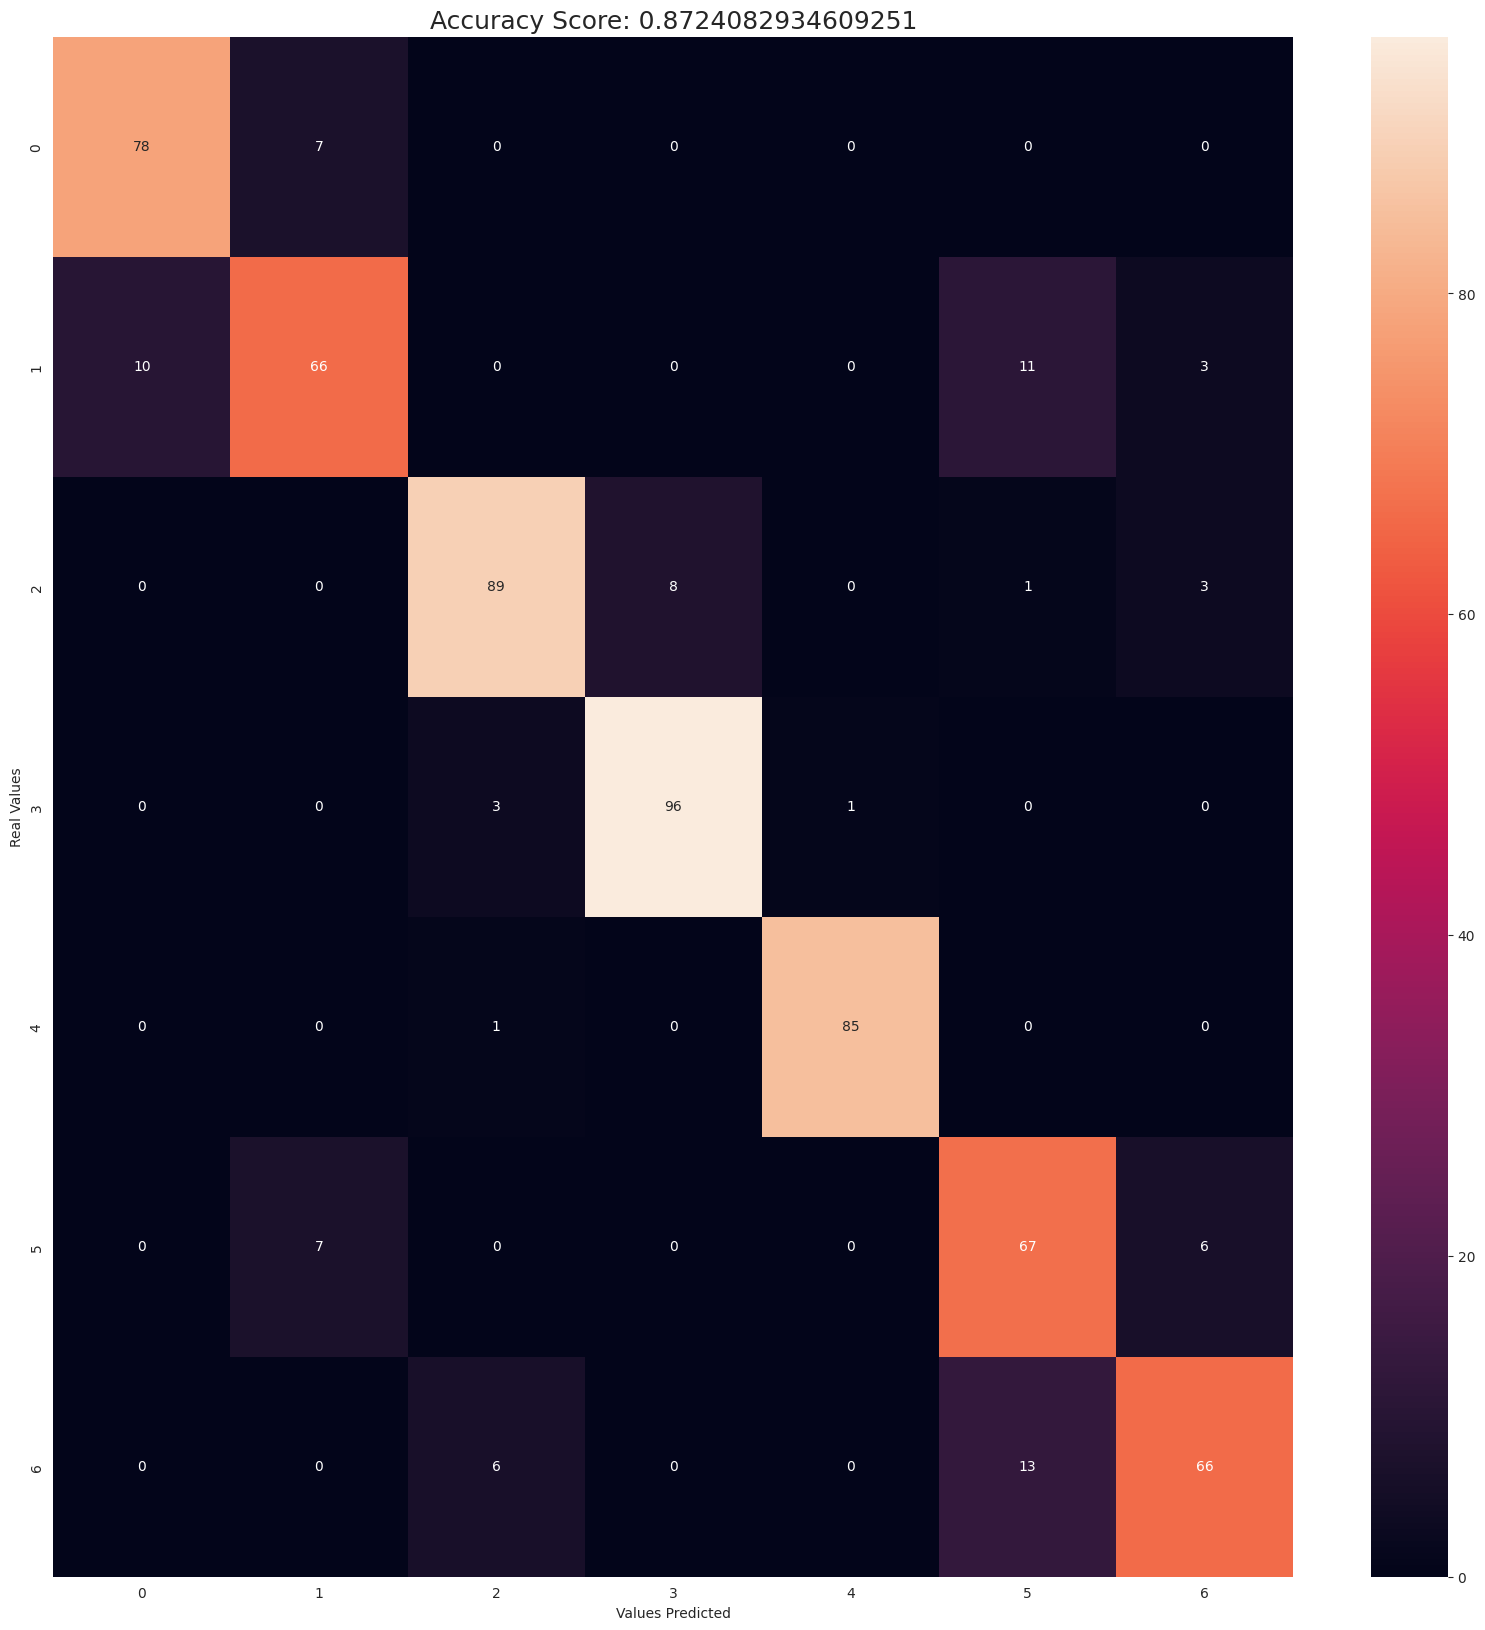

In [ ]:
plt.figure(figsize=(20,20))
sns.heatmap(c, annot=True)
sample_title= 'Accuracy Score: {0}'.format(acc_score)
plt.title(sample_title, size = 18)
plt.xlabel('Values Predicted')
plt.ylabel('Real Values')

## ROC CURVE for LOGISTIC REGRESSION

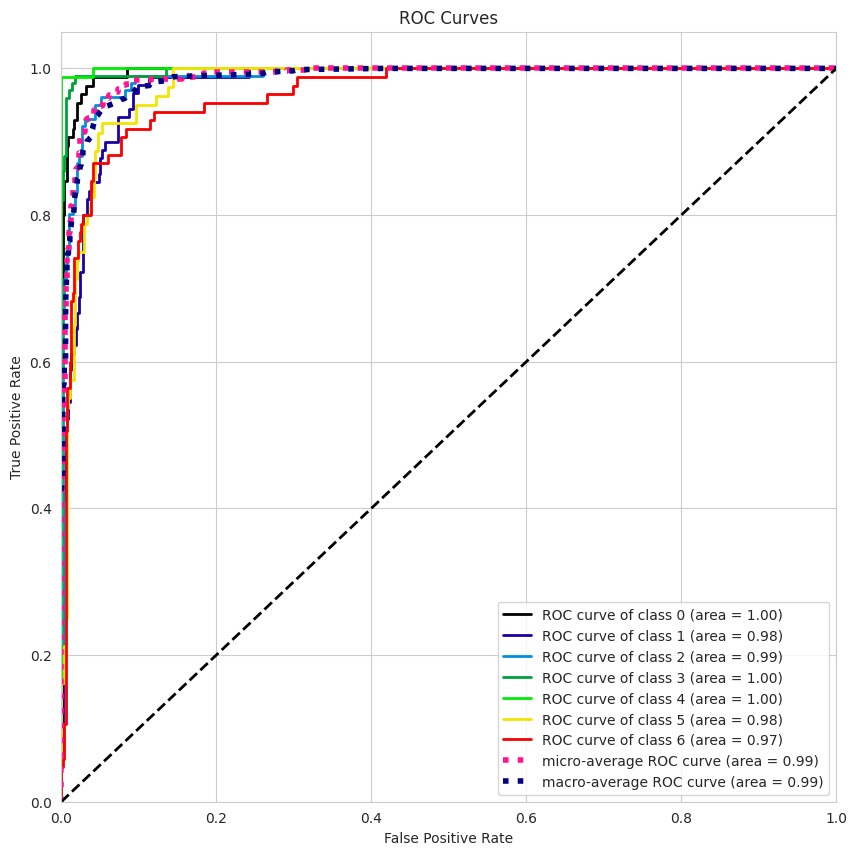

In [ ]:
plt.rcParams['figure.figsize'] = [10, 10]

predicted_probas = LR.predict_proba(X_test)
import matplotlib.pyplot as plt
import scikitplot as skplt
skplt.metrics.plot_roc(LogR_expected, predicted_probas)

plt.show()

## Clssification Report for Logistic Regression

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(LogR_expected,LogR_predicted))

              precision    recall  f1-score   support

           0       0.89      0.92      0.90        85
           1       0.82      0.73      0.78        90
           2       0.90      0.88      0.89       101
           3       0.92      0.96      0.94       100
           4       0.99      0.99      0.99        86
           5       0.73      0.84      0.78        80
           6       0.85      0.78      0.81        85

    accuracy                           0.87       627
   macro avg       0.87      0.87      0.87       627
weighted avg       0.87      0.87      0.87       627



# Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
RF= RandomForestClassifier(n_estimators=50, max_features="sqrt", random_state=44)
RF.fit(X_train, y_train)

RandomForestClassifier(n_estimators=50, random_state=44)

In [ ]:
RF_expected = y_test
RF_predicted = RF.predict(X_test)
RF_predicted

array([0, 2, 4, 0, 5, 0, 4, 2, 6, 1, 6, 3, 3, 5, 3, 0, 0, 0, 6, 1, 5, 4,
       6, 6, 0, 1, 5, 4, 3, 4, 6, 5, 1, 2, 2, 0, 1, 2, 5, 2, 4, 0, 1, 0,
       6, 1, 1, 2, 2, 2, 3, 5, 6, 6, 1, 6, 3, 2, 4, 4, 2, 6, 3, 0, 3, 6,
       1, 5, 1, 0, 3, 0, 1, 3, 3, 5, 2, 6, 4, 1, 2, 0, 3, 1, 0, 3, 5, 2,
       4, 3, 5, 2, 4, 6, 4, 0, 0, 6, 4, 2, 1, 2, 1, 5, 2, 6, 4, 2, 4, 0,
       1, 0, 3, 6, 1, 2, 3, 0, 5, 5, 6, 5, 3, 1, 3, 3, 3, 6, 6, 3, 2, 0,
       4, 4, 6, 4, 2, 4, 4, 6, 6, 1, 6, 6, 4, 2, 2, 3, 1, 1, 5, 0, 4, 0,
       3, 6, 1, 0, 4, 5, 4, 4, 4, 6, 6, 3, 2, 5, 5, 2, 4, 2, 2, 3, 4, 1,
       2, 3, 1, 3, 1, 2, 2, 4, 2, 1, 6, 1, 3, 1, 1, 6, 5, 0, 6, 6, 4, 6,
       0, 4, 1, 4, 4, 0, 5, 3, 2, 3, 2, 2, 6, 3, 3, 0, 6, 5, 2, 6, 0, 3,
       4, 4, 6, 2, 6, 2, 2, 0, 1, 3, 5, 1, 1, 5, 6, 2, 3, 5, 4, 4, 4, 4,
       4, 4, 3, 5, 0, 1, 4, 1, 4, 5, 4, 3, 4, 1, 3, 5, 5, 6, 3, 4, 4, 1,
       5, 1, 3, 3, 3, 3, 0, 0, 3, 5, 1, 5, 3, 5, 2, 6, 4, 5, 0, 0, 2, 6,
       4, 5, 4, 5, 4, 0, 1, 2, 0, 6, 1, 0, 6, 1, 6,

## Accuracy score for Random Forest

In [ ]:
RFacc_score = RF.score(X_test,y_test)
print(RFacc_score)

0.9473684210526315


## Confusion matrix for Random Forest

In [ ]:
from sklearn.metrics import confusion_matrix
c_RF= confusion_matrix(RF_expected,RF_predicted)
print(pd.crosstab(RF_expected, RF_predicted, rownames=['Actual BMI'], colnames=['Predicted BMI']))

Predicted BMI   0   1   2   3   4   5   6
Actual BMI                               
0              81   4   0   0   0   0   0
1               2  81   0   0   0   5   2
2               0   1  96   1   0   1   2
3               0   0   1  98   1   0   0
4               0   0   0   0  86   0   0
5               0   5   0   0   0  74   1
6               0   3   3   0   0   1  78


Text(220.72222222222223, 0.5, 'Real Values')

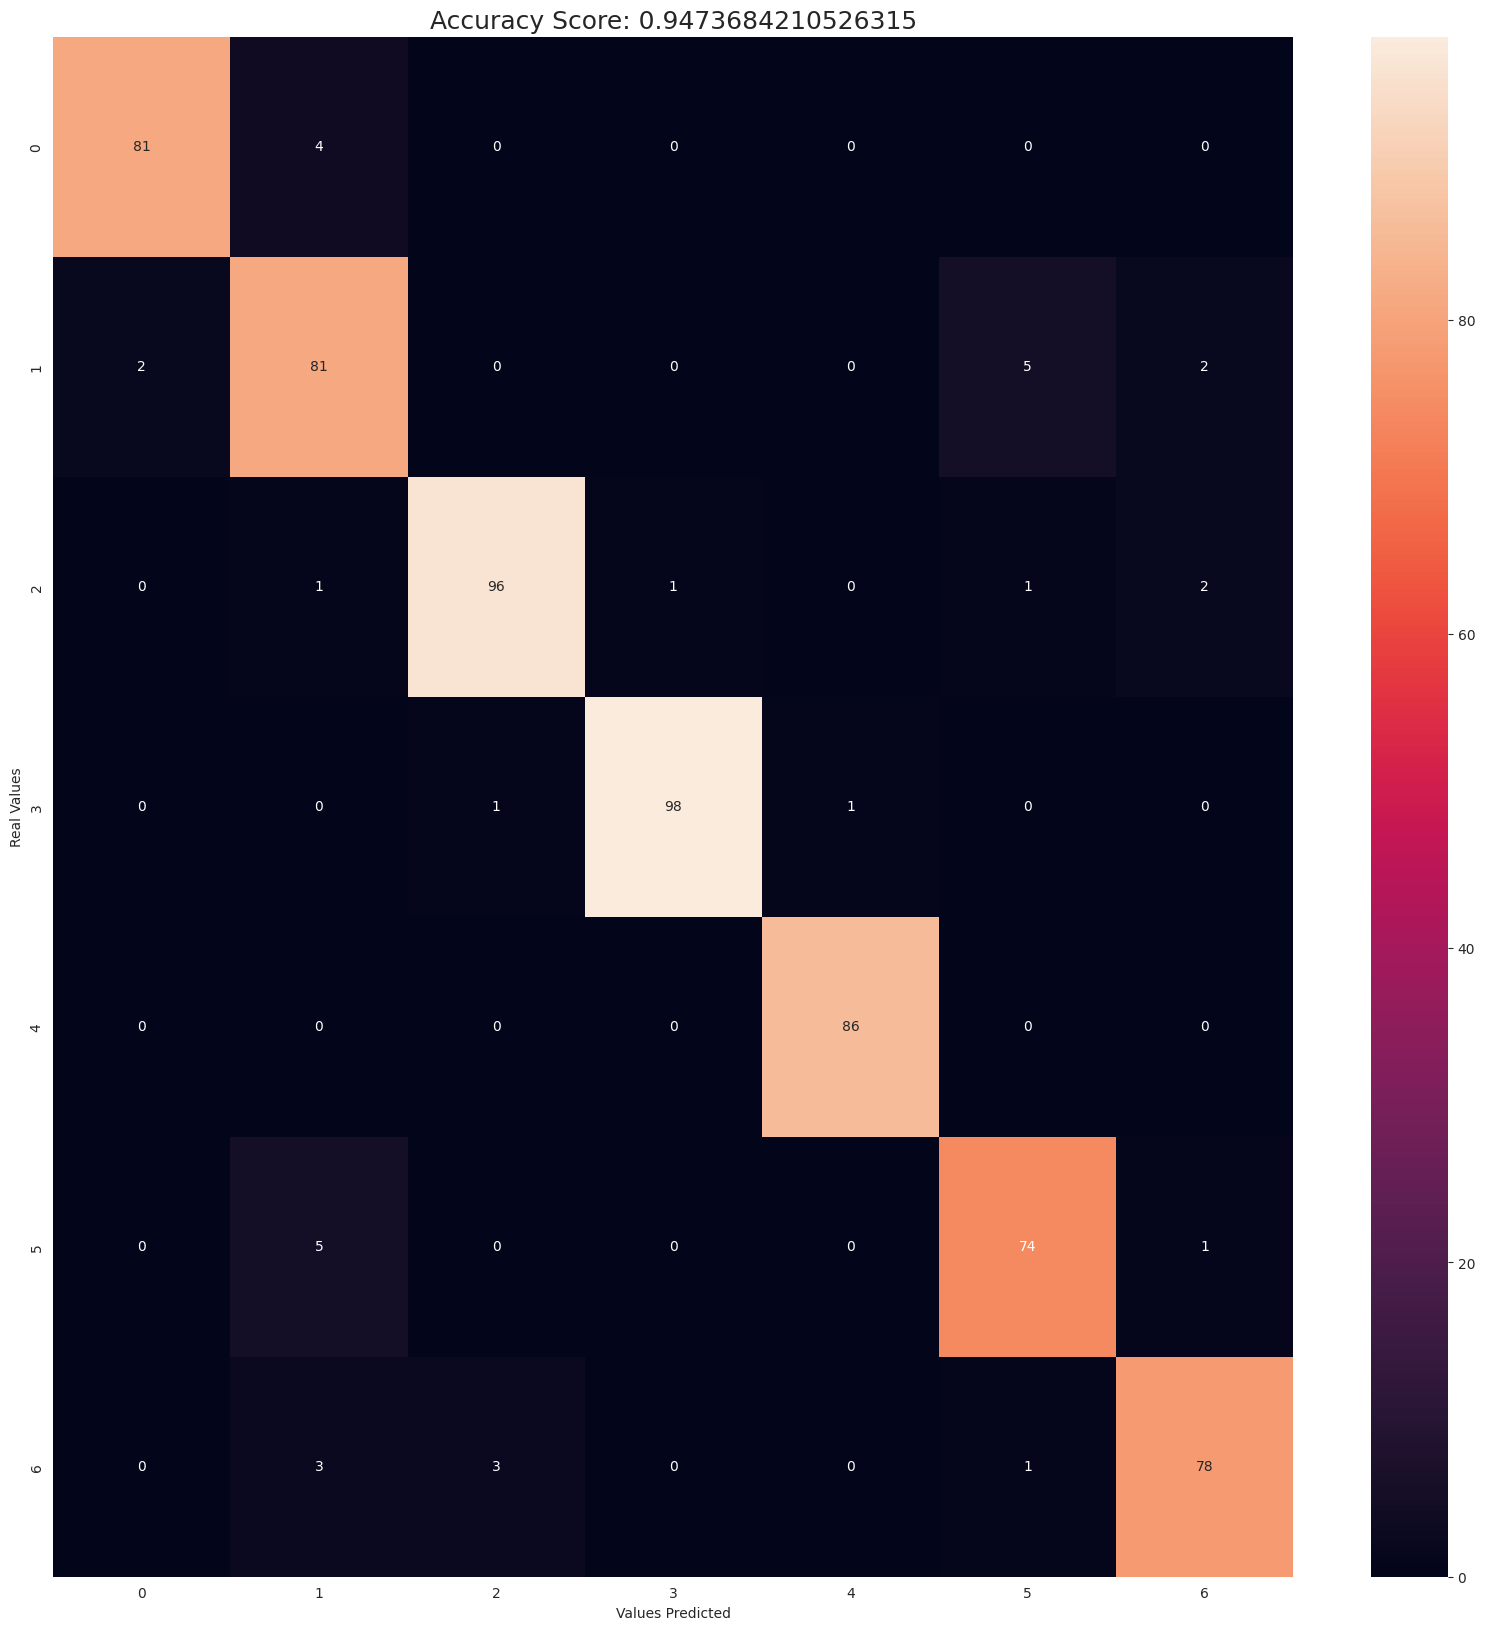

In [ ]:
plt.figure(figsize=(20,20))
sns.heatmap(c_RF, annot=True)
sample_title = 'Accuracy Score: {0}'.format(RFacc_score)
plt.title(sample_title, size = 18)
plt.xlabel('Values Predicted')
plt.ylabel('Real Values')

## ROC CURVE for RANDOM FOREST

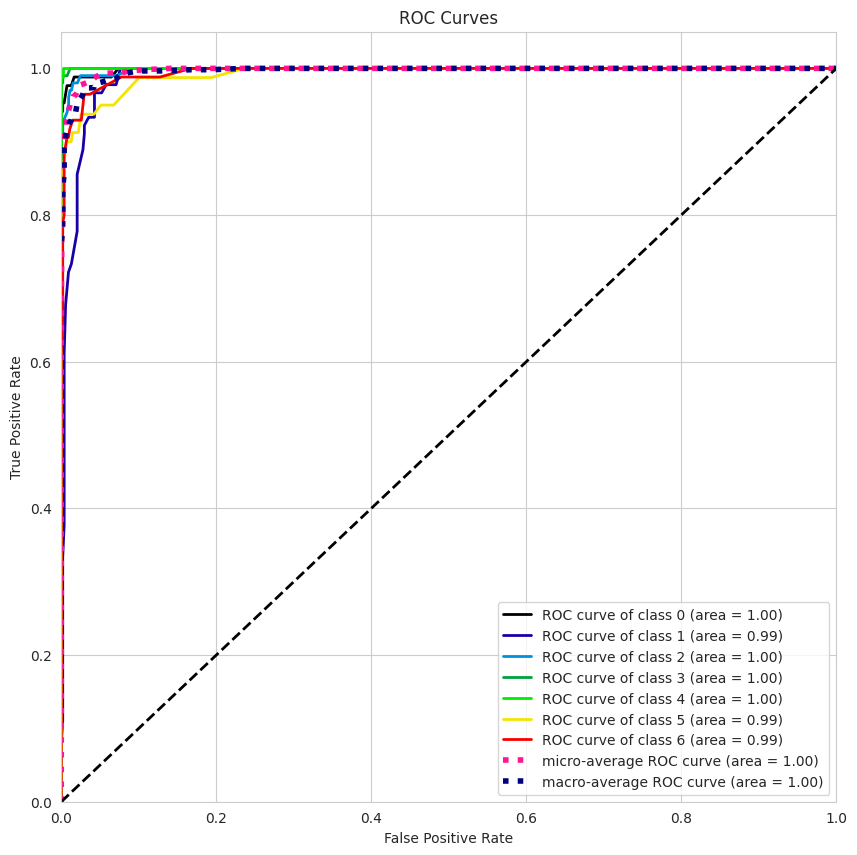

In [ ]:
plt.rcParams['figure.figsize'] = [10, 10]

predicted_probas = RF.predict_proba(X_test)
import matplotlib.pyplot as plt
import scikitplot as skplt
skplt.metrics.plot_roc(RF_expected, predicted_probas)

plt.show()

## Classification Report for Random Forest

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(RF_expected,RF_predicted))

              precision    recall  f1-score   support

           0       0.98      0.95      0.96        85
           1       0.86      0.90      0.88        90
           2       0.96      0.95      0.96       101
           3       0.99      0.98      0.98       100
           4       0.99      1.00      0.99        86
           5       0.91      0.93      0.92        80
           6       0.94      0.92      0.93        85

    accuracy                           0.95       627
   macro avg       0.95      0.95      0.95       627
weighted avg       0.95      0.95      0.95       627



# Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
DC = DecisionTreeClassifier(criterion='entropy',max_depth=3, random_state=42)
DC.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=42)

In [ ]:
DC_expected = y_test
DC_predicted = DC.predict(X_test)
DC_predicted

array([0, 3, 4, 1, 5, 0, 4, 2, 2, 5, 2, 3, 3, 2, 3, 1, 1, 5, 2, 1, 5, 4,
       5, 2, 1, 5, 5, 4, 2, 4, 2, 2, 1, 2, 2, 1, 1, 2, 1, 2, 4, 0, 0, 0,
       2, 1, 2, 2, 2, 2, 2, 5, 2, 2, 5, 2, 2, 2, 4, 4, 2, 2, 3, 1, 3, 5,
       1, 5, 5, 1, 3, 0, 5, 3, 3, 5, 2, 2, 4, 1, 2, 1, 3, 5, 1, 3, 5, 2,
       4, 3, 5, 2, 4, 2, 4, 1, 0, 2, 4, 2, 5, 2, 1, 5, 2, 5, 4, 2, 4, 1,
       1, 0, 2, 5, 5, 2, 3, 0, 2, 5, 2, 5, 3, 5, 3, 2, 3, 2, 2, 3, 2, 0,
       4, 4, 2, 4, 2, 4, 4, 2, 2, 0, 2, 2, 4, 2, 2, 2, 1, 5, 2, 1, 4, 1,
       3, 2, 1, 0, 4, 5, 4, 4, 4, 2, 2, 3, 2, 5, 5, 2, 4, 2, 2, 3, 4, 1,
       3, 3, 5, 3, 1, 2, 2, 4, 2, 0, 2, 5, 3, 1, 5, 5, 5, 1, 2, 2, 4, 2,
       1, 4, 5, 4, 4, 1, 5, 2, 3, 3, 2, 5, 2, 3, 3, 5, 2, 5, 2, 2, 0, 2,
       4, 4, 2, 2, 2, 2, 2, 0, 1, 3, 2, 5, 5, 2, 2, 2, 3, 5, 4, 4, 4, 4,
       4, 4, 3, 5, 1, 5, 4, 1, 4, 5, 4, 2, 4, 0, 3, 5, 2, 2, 3, 4, 4, 1,
       2, 5, 3, 3, 3, 3, 1, 0, 3, 5, 5, 5, 3, 5, 2, 2, 4, 2, 1, 0, 2, 2,
       4, 5, 4, 2, 4, 0, 5, 2, 1, 2, 5, 0, 5, 1, 2,

## Accuracy score for Decision Tree 

In [ ]:
DCacc_score = DC.score(X_test,y_test)
print(DCacc_score)

0.6283891547049442


## Confusion matrix for Decision Tree

In [ ]:
from sklearn.metrics import confusion_matrix
c_DC= confusion_matrix(DC_expected,DC_predicted)
print(pd.crosstab(DC_expected, DC_predicted, rownames=['Actual BMI'], colnames=['Predicted BMI']))

Predicted BMI   0   1   2   3   4   5
Actual BMI                           
0              39  44   0   0   0   2
1               3  41   4   0   0  42
2               0   0  94   6   0   1
3               0   0  19  80   1   0
4               0   0   0   0  86   0
5               0   3  23   0   0  54
6               0   0  74   0   0  11


Text(220.72222222222223, 0.5, 'Real Values')

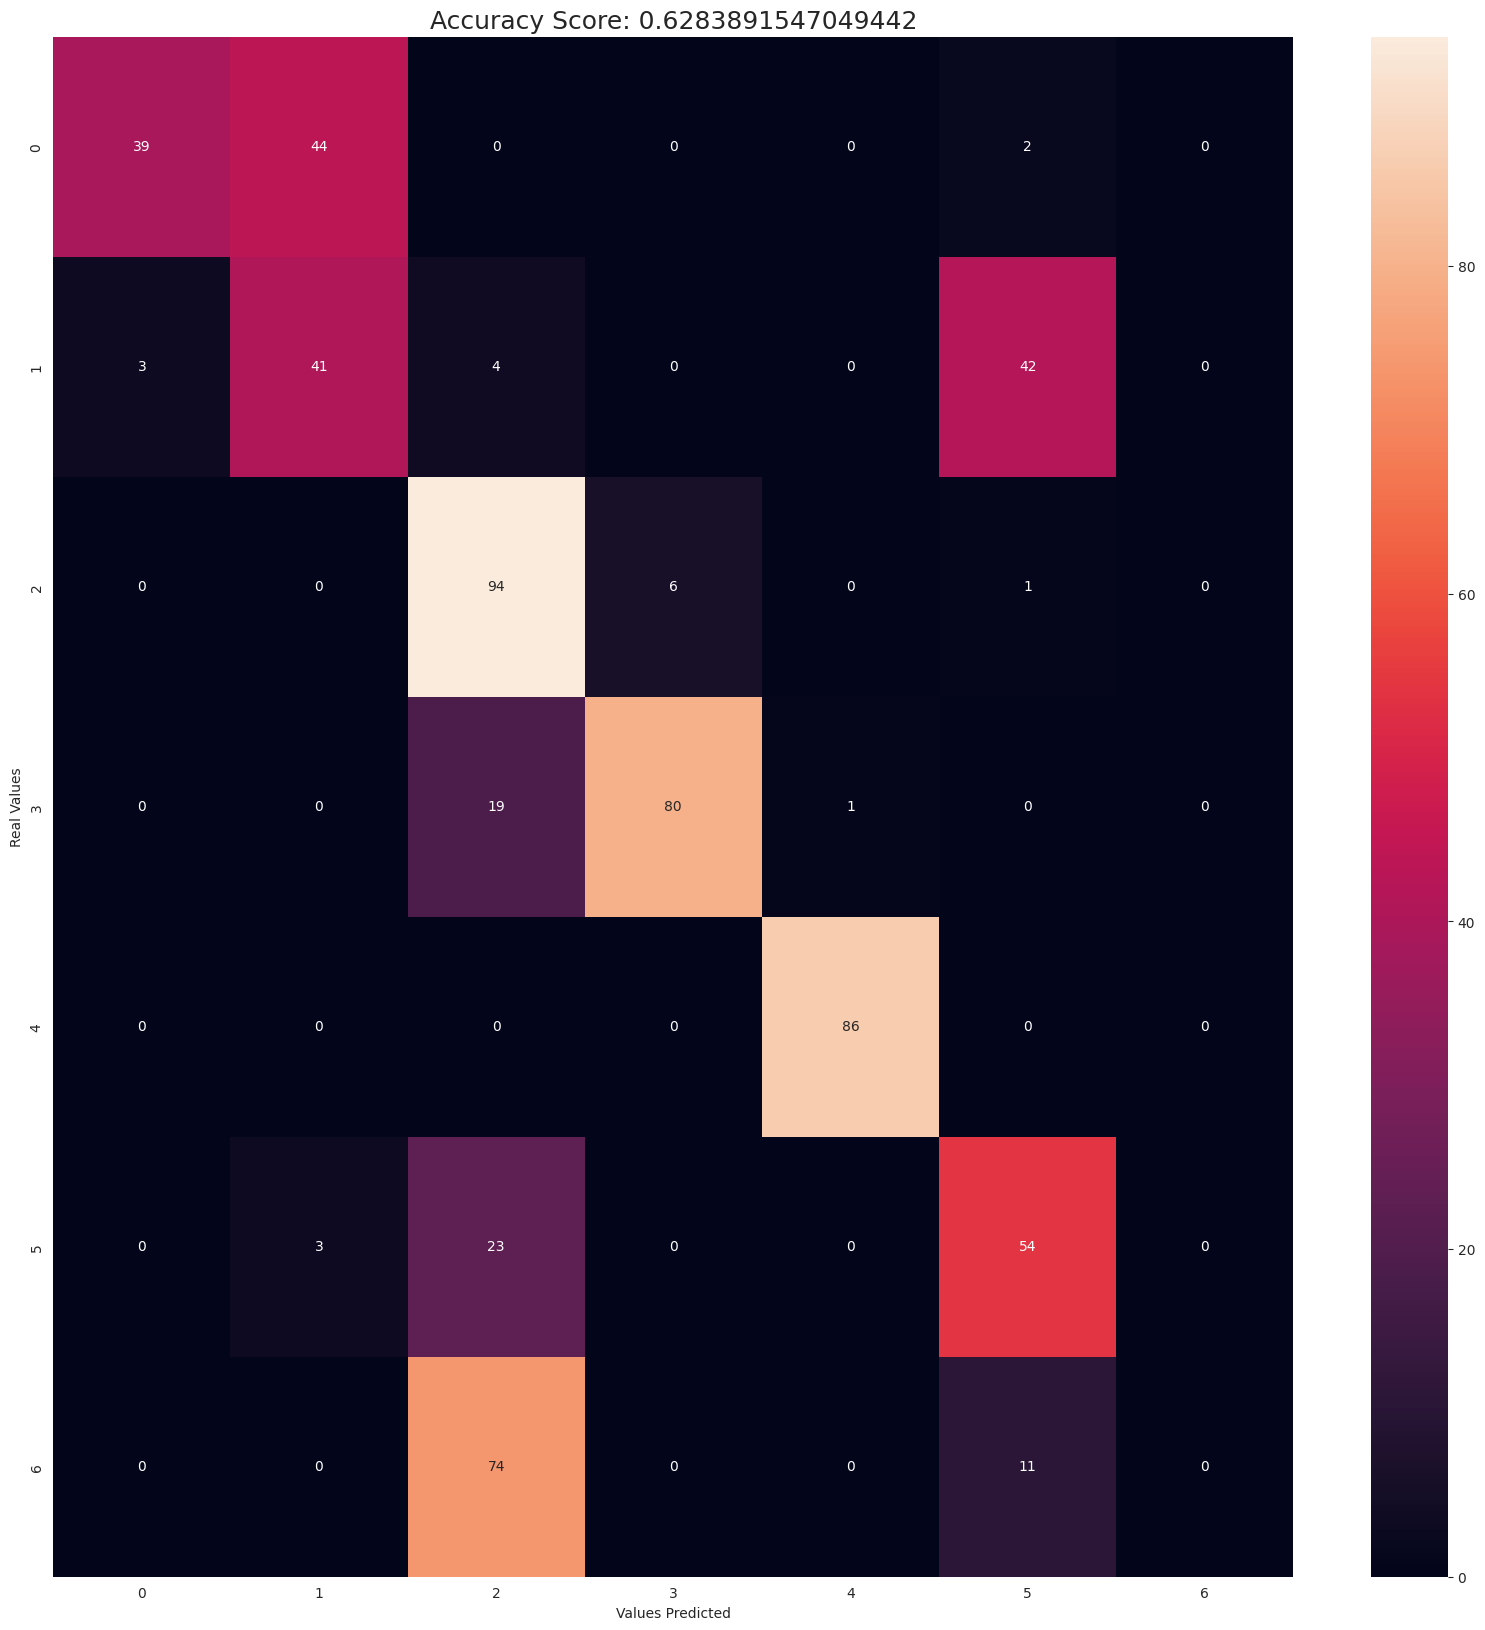

In [ ]:
plt.figure(figsize=(20,20))
sns.heatmap(c_DC, annot=True)
sample_title = 'Accuracy Score: {0}'.format(DCacc_score)
plt.title(sample_title, size = 18)
plt.xlabel('Values Predicted')
plt.ylabel('Real Values')

## ROC CURVE for DECISION TREE

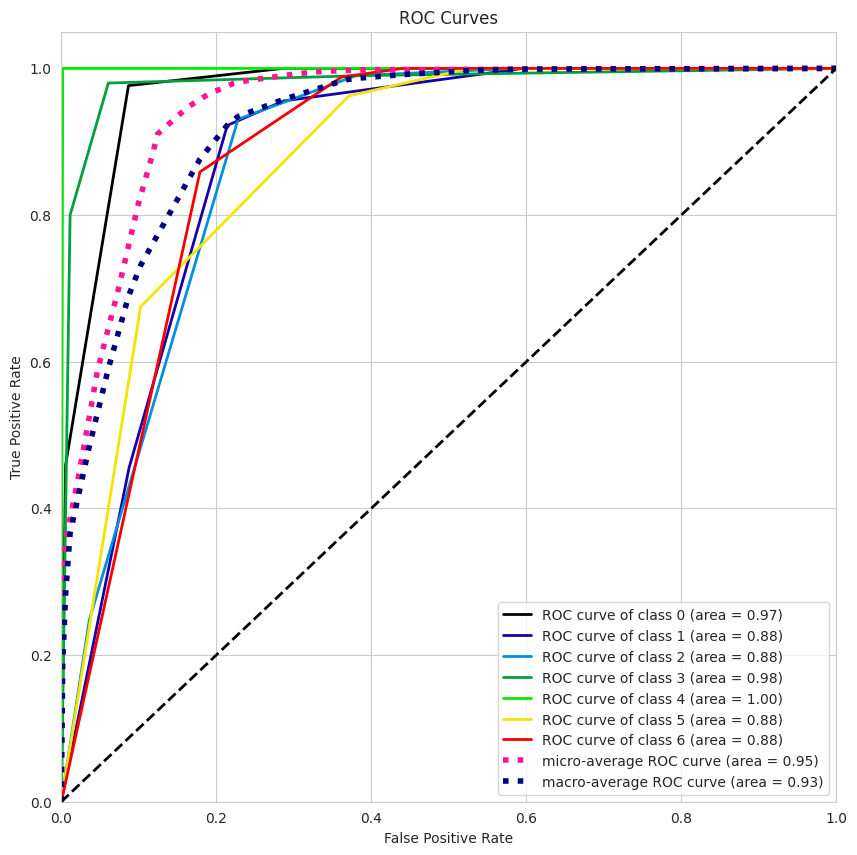

In [ ]:
plt.rcParams['figure.figsize'] = [10, 10]

predicted_probas = DC.predict_proba(X_test)
import matplotlib.pyplot as plt
import scikitplot as skplt
skplt.metrics.plot_roc(DC_expected, predicted_probas)

plt.show()

## classificiation Report of Decision Tree

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(DC_expected,DC_predicted))

              precision    recall  f1-score   support

           0       0.93      0.46      0.61        85
           1       0.47      0.46      0.46        90
           2       0.44      0.93      0.60       101
           3       0.93      0.80      0.86       100
           4       0.99      1.00      0.99        86
           5       0.49      0.68      0.57        80
           6       0.00      0.00      0.00        85

    accuracy                           0.63       627
   macro avg       0.61      0.62      0.58       627
weighted avg       0.61      0.63      0.59       627



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Support Vector Machine

In [ ]:
from sklearn.svm import SVC

In [ ]:
svm=SVC(gamma = 'auto', class_weight = "balanced", probability = True) 
svm.fit(X_train,y_train)


SVC(class_weight='balanced', gamma='auto', probability=True)

In [ ]:
svm_expected = y_test
svm_predicted = svm.predict(X_test)
svm_predicted

array([0, 2, 6, 0, 5, 0, 4, 2, 6, 1, 6, 3, 3, 5, 3, 0, 0, 0, 2, 1, 5, 4,
       6, 6, 0, 1, 5, 4, 3, 4, 6, 5, 1, 2, 2, 0, 1, 2, 5, 2, 4, 0, 0, 1,
       6, 1, 1, 2, 6, 2, 3, 5, 6, 6, 1, 6, 3, 2, 4, 4, 2, 5, 3, 0, 3, 6,
       0, 1, 1, 0, 3, 0, 1, 3, 3, 5, 2, 6, 4, 1, 2, 0, 3, 1, 0, 3, 5, 2,
       4, 3, 5, 2, 4, 6, 4, 0, 0, 6, 4, 2, 1, 2, 1, 5, 2, 6, 4, 5, 4, 0,
       1, 0, 3, 6, 1, 2, 3, 0, 5, 5, 6, 5, 3, 1, 3, 3, 3, 6, 6, 3, 2, 0,
       4, 4, 1, 4, 2, 4, 4, 6, 2, 1, 6, 6, 4, 3, 2, 3, 0, 6, 5, 0, 4, 1,
       3, 6, 1, 0, 4, 5, 4, 4, 4, 6, 2, 3, 2, 5, 5, 2, 4, 2, 2, 3, 4, 1,
       2, 3, 1, 3, 1, 2, 2, 4, 2, 1, 6, 5, 3, 1, 1, 6, 6, 0, 5, 6, 4, 6,
       0, 4, 1, 4, 4, 0, 5, 3, 2, 3, 2, 2, 6, 3, 3, 0, 1, 1, 2, 6, 0, 3,
       4, 4, 6, 2, 6, 2, 2, 0, 1, 3, 5, 1, 1, 5, 6, 2, 3, 5, 4, 4, 4, 4,
       4, 4, 3, 5, 0, 1, 4, 1, 4, 5, 4, 3, 4, 1, 3, 5, 5, 6, 3, 4, 4, 1,
       1, 1, 3, 6, 3, 3, 0, 0, 3, 5, 1, 5, 3, 5, 2, 6, 4, 5, 0, 0, 6, 6,
       4, 5, 4, 6, 4, 0, 1, 2, 0, 6, 0, 0, 6, 1, 6,

## Accuracy Score For SVM

In [ ]:
svmacc_score = svm.score(X_test,y_test)
print(svmacc_score)

0.8835725677830941


## Confusion Matrix for SVM

In [ ]:
from sklearn.metrics import confusion_matrix
c_svm= confusion_matrix(svm_expected,svm_predicted)
print(pd.crosstab(svm_expected, svm_predicted, rownames=['Actual BMI'], colnames=['Predicted BMI']))

Predicted BMI   0   1   2   3   4   5   6
Actual BMI                               
0              79   6   0   0   0   0   0
1               6  73   0   0   0   7   4
2               0   2  87   4   0   3   5
3               0   0   2  97   0   0   1
4               0   0   0   0  85   0   1
5               0  11   1   0   0  65   3
6               0   4   6   0   0   7  68


Text(220.72222222222223, 0.5, 'Real Values')

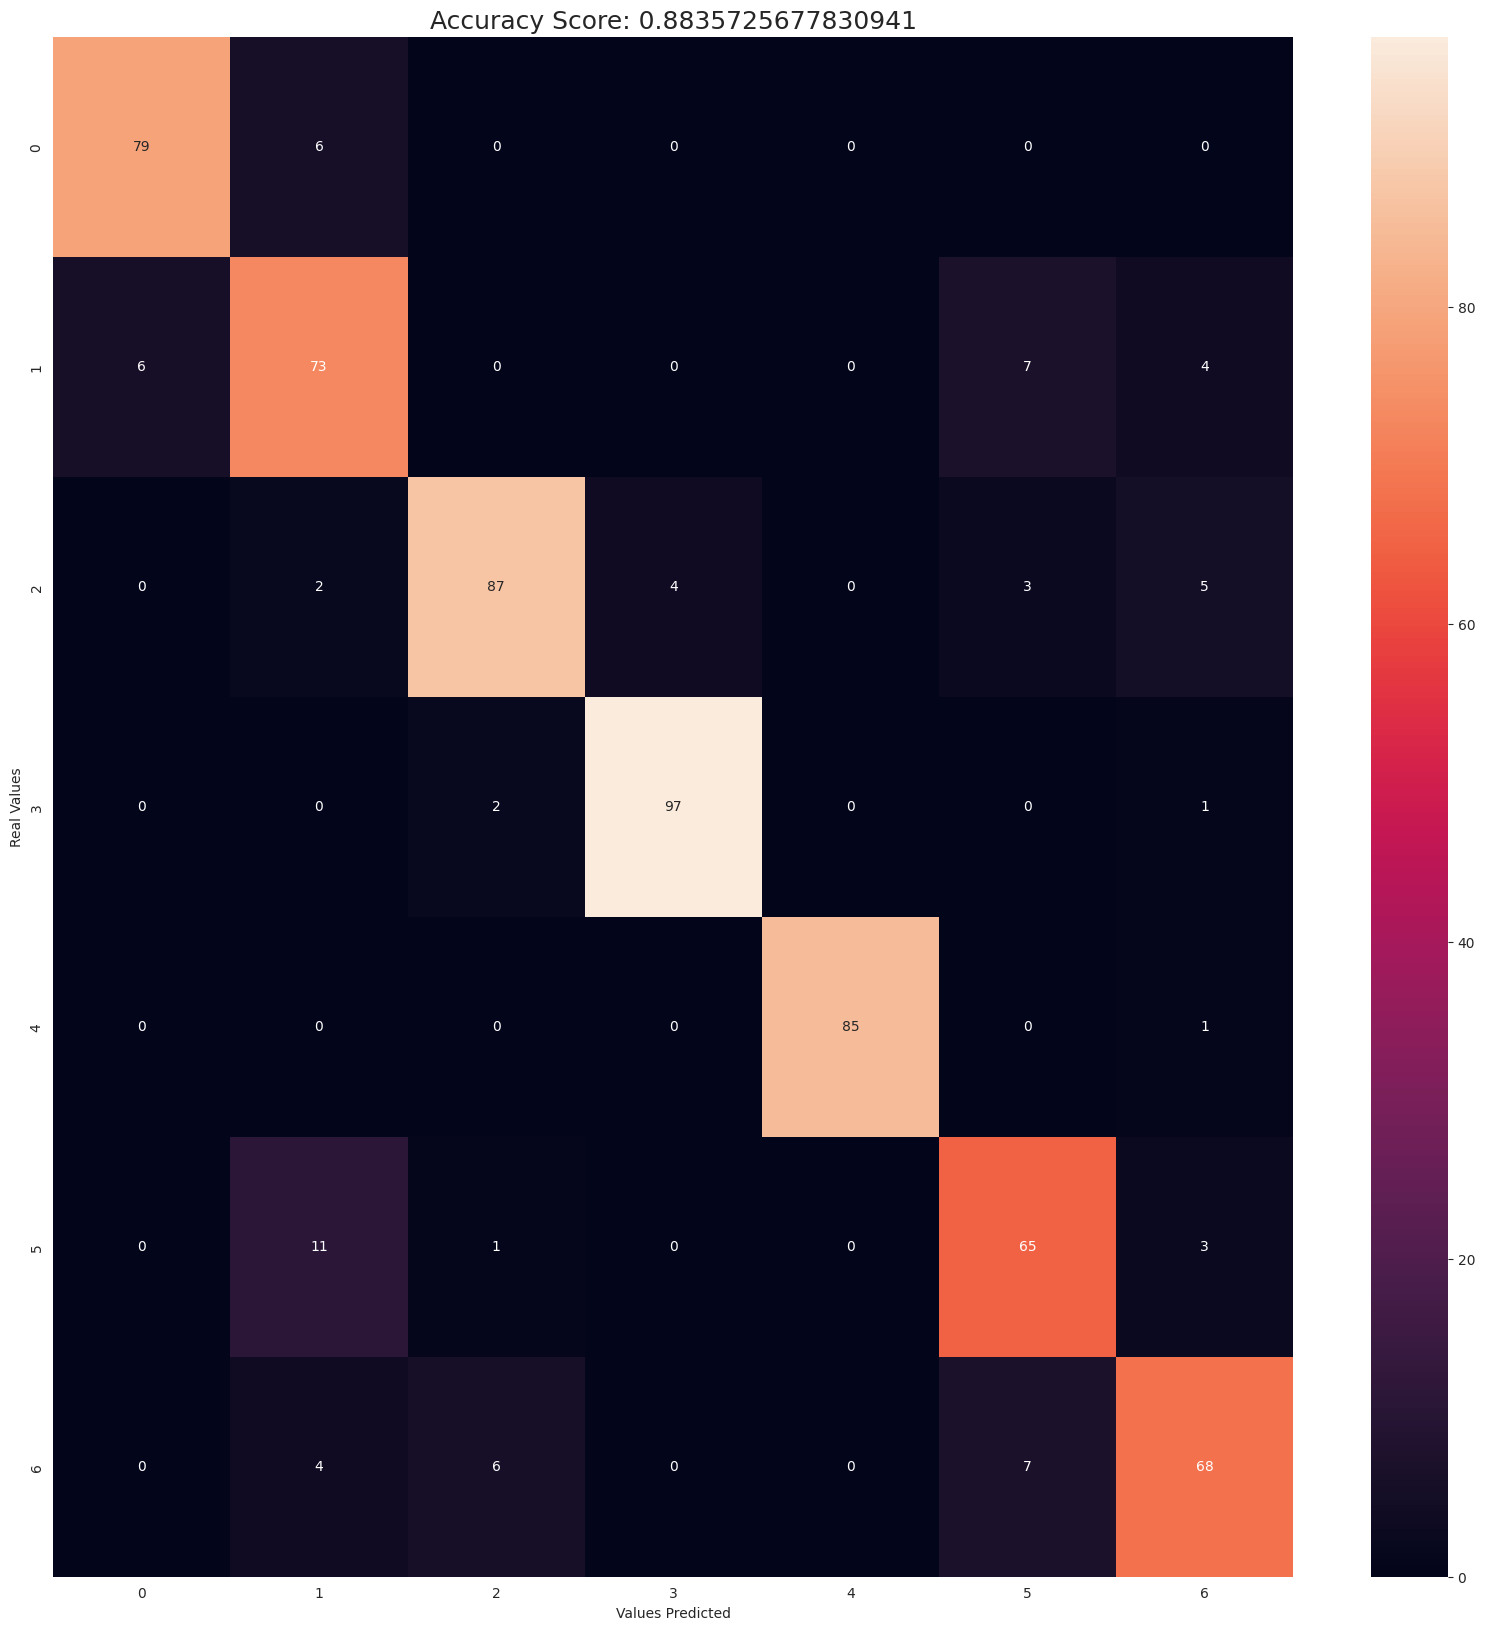

In [ ]:
plt.figure(figsize=(20,20))
sns.heatmap(c_svm, annot=True)
sample_title = 'Accuracy Score: {0}'.format(svmacc_score)
plt.title(sample_title, size = 18)
plt.xlabel('Values Predicted')
plt.ylabel('Real Values')

## ROC curve for SVM

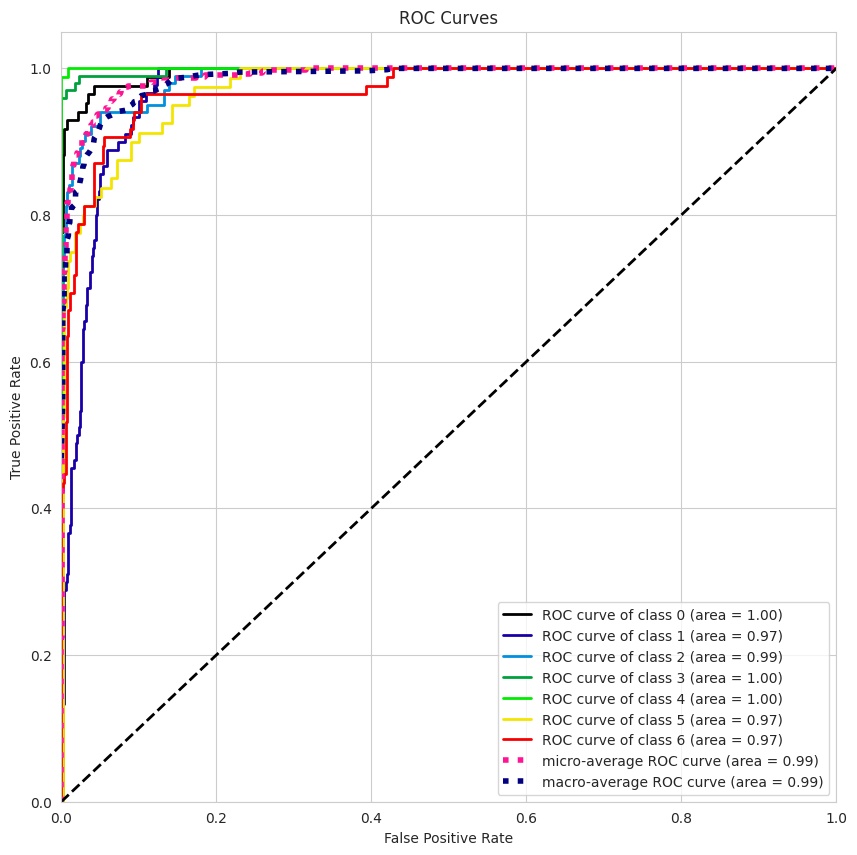

In [ ]:
plt.rcParams['figure.figsize'] = [10, 10]

predicted_probas = svm.predict_proba(X_test)
import matplotlib.pyplot as plt
import scikitplot as skplt
skplt.metrics.plot_roc(svm_expected, predicted_probas)

plt.show()

## Classification Report For SVM

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(svm_expected,svm_predicted))

              precision    recall  f1-score   support

           0       0.93      0.93      0.93        85
           1       0.76      0.81      0.78        90
           2       0.91      0.86      0.88       101
           3       0.96      0.97      0.97       100
           4       1.00      0.99      0.99        86
           5       0.79      0.81      0.80        80
           6       0.83      0.80      0.81        85

    accuracy                           0.88       627
   macro avg       0.88      0.88      0.88       627
weighted avg       0.89      0.88      0.88       627



# K nearest neighbour

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn=KNeighborsClassifier()
knn.fit(X_train,y_train)


KNeighborsClassifier()

In [ ]:
knn_expected = y_test
knn_predicted = knn.predict(X_test)
knn_predicted

array([0, 2, 5, 0, 6, 0, 4, 2, 6, 1, 6, 3, 3, 5, 3, 0, 0, 0, 2, 1, 5, 4,
       6, 5, 0, 5, 5, 4, 3, 4, 2, 2, 0, 2, 2, 0, 1, 2, 5, 2, 4, 0, 0, 1,
       5, 1, 1, 2, 2, 2, 3, 5, 6, 3, 5, 2, 3, 2, 4, 4, 2, 5, 3, 0, 3, 6,
       0, 1, 2, 0, 3, 0, 1, 3, 3, 5, 2, 6, 4, 5, 3, 0, 3, 1, 0, 3, 5, 2,
       4, 3, 5, 2, 4, 6, 4, 0, 0, 6, 4, 2, 1, 2, 1, 5, 2, 6, 4, 5, 4, 0,
       1, 0, 3, 6, 1, 2, 3, 0, 1, 1, 6, 5, 3, 1, 3, 3, 3, 6, 6, 3, 2, 0,
       4, 4, 1, 4, 2, 4, 4, 6, 2, 1, 6, 2, 4, 3, 2, 5, 0, 6, 1, 0, 4, 0,
       3, 6, 1, 1, 4, 5, 4, 4, 4, 3, 6, 3, 2, 5, 2, 2, 4, 2, 2, 3, 4, 0,
       2, 3, 6, 3, 6, 2, 2, 4, 2, 1, 6, 5, 3, 1, 1, 6, 6, 0, 6, 4, 4, 3,
       1, 4, 1, 4, 4, 0, 5, 3, 2, 3, 2, 2, 6, 3, 3, 0, 1, 1, 2, 6, 0, 3,
       4, 4, 6, 2, 6, 2, 2, 0, 1, 3, 5, 1, 1, 5, 2, 2, 3, 5, 4, 4, 4, 4,
       4, 4, 3, 5, 5, 1, 4, 5, 4, 5, 4, 3, 4, 1, 3, 5, 5, 6, 3, 4, 4, 2,
       1, 1, 3, 3, 3, 3, 0, 0, 3, 5, 1, 5, 3, 5, 2, 6, 4, 5, 0, 0, 6, 2,
       4, 0, 4, 6, 4, 0, 1, 2, 0, 6, 5, 0, 6, 1, 6,

## Accuracy Score for KNN

In [ ]:
knnacc_score = knn.score(X_test,y_test)
print(knnacc_score)

0.7878787878787878


## Confusion matrix for KNN

In [ ]:
c_knn= confusion_matrix(knn_expected,knn_predicted)
print(pd.crosstab(knn_expected, knn_predicted, rownames=['Actual BMI'], colnames=['Predicted BMI']))


Predicted BMI   0   1   2   3   4   5   6
Actual BMI                               
0              75   8   0   0   0   1   1
1              18  44   4   0   0  14  10
2               1   3  82   5   0   7   3
3               0   0   5  94   0   1   0
4               0   0   0   0  85   1   0
5               1  13   5   0   1  56   4
6               0   5  12   4   1   5  58


Text(220.72222222222223, 0.5, 'Real Values')

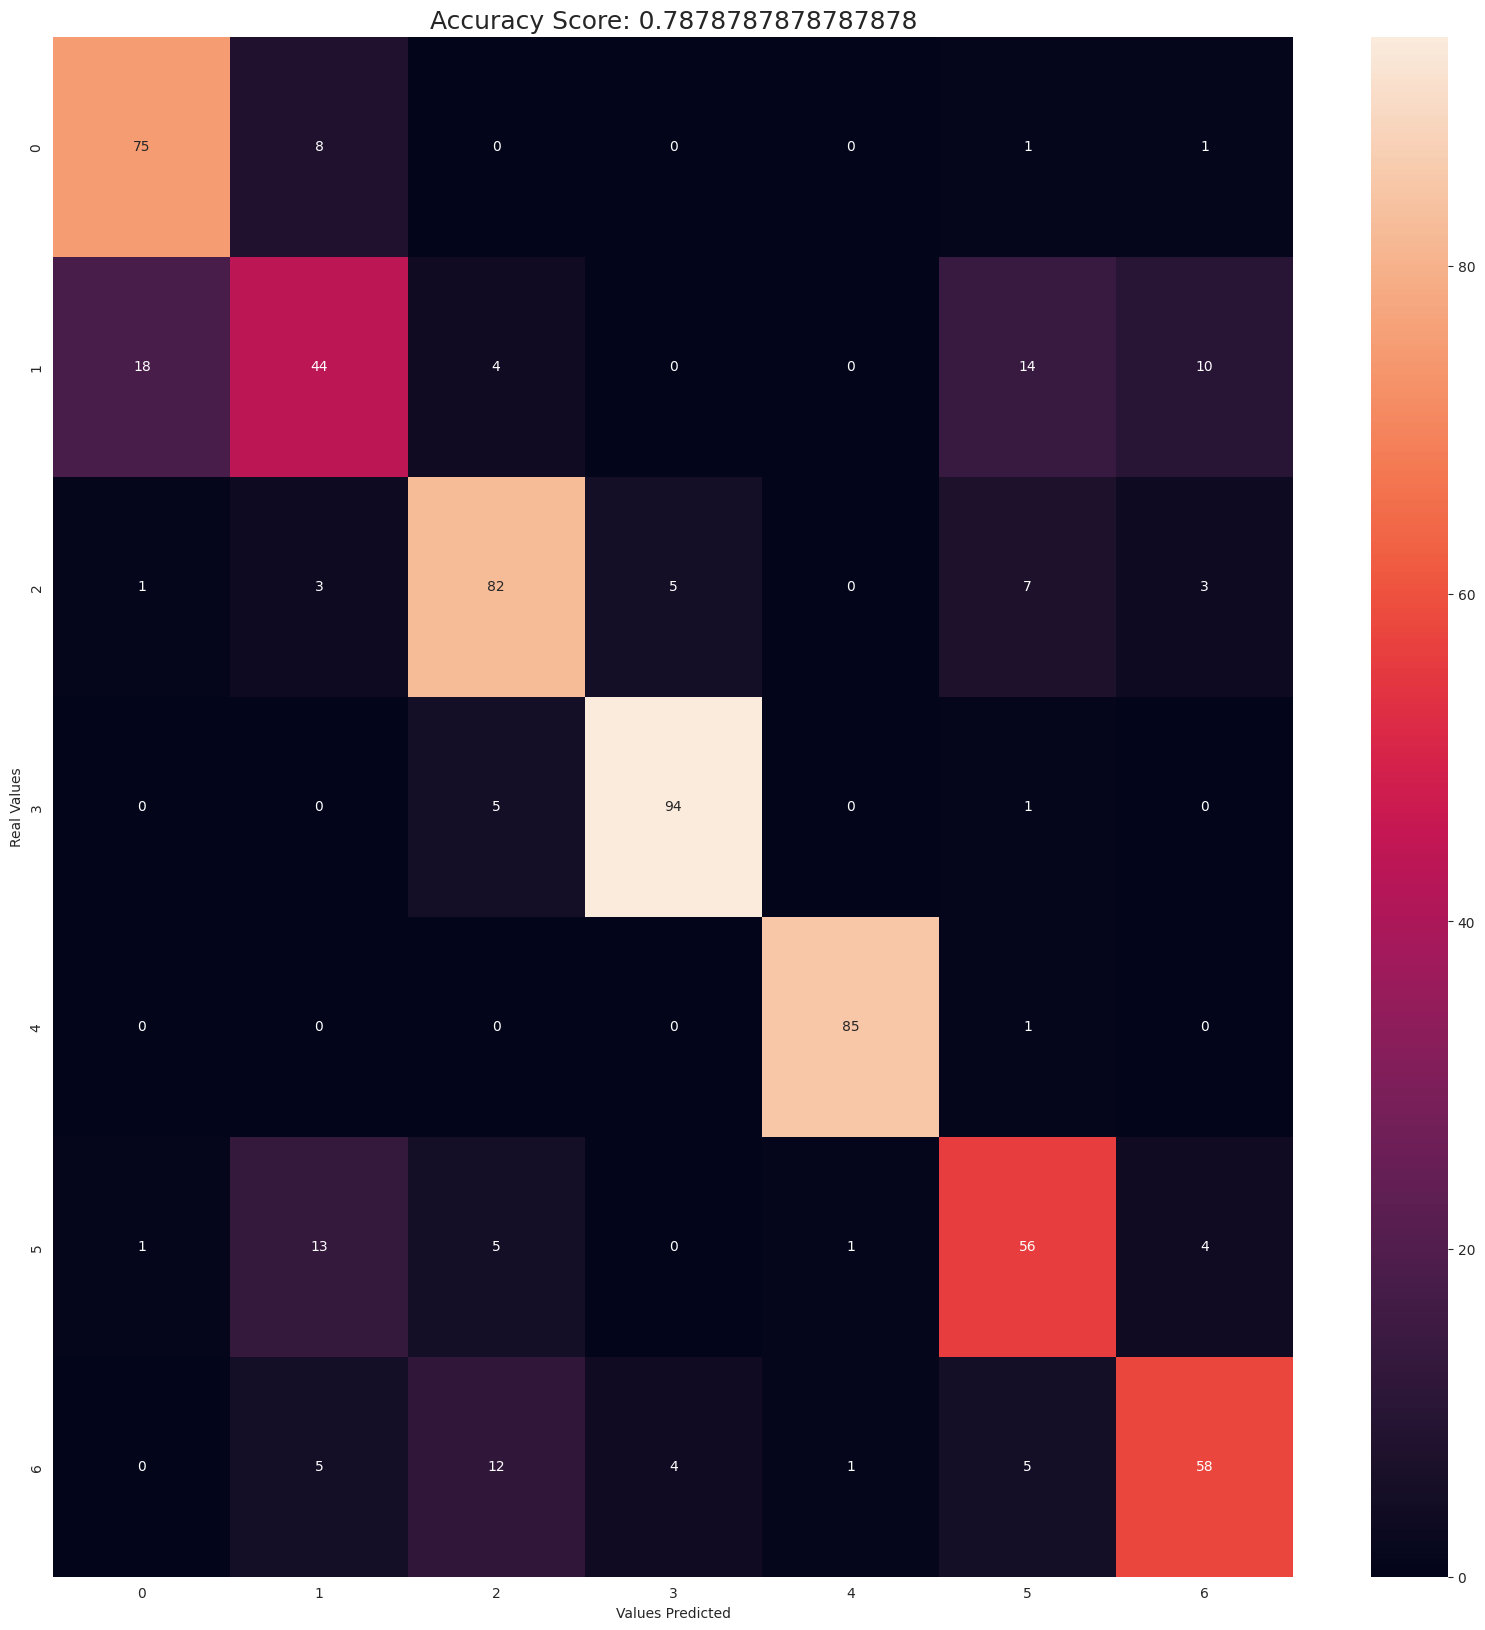

In [ ]:
plt.figure(figsize=(20,20))
sns.heatmap(c_knn, annot=True)
sample_title = 'Accuracy Score: {0}'.format(knnacc_score)
plt.title(sample_title, size = 18)
plt.xlabel('Values Predicted')
plt.ylabel('Real Values')

## ROC curve for KNN

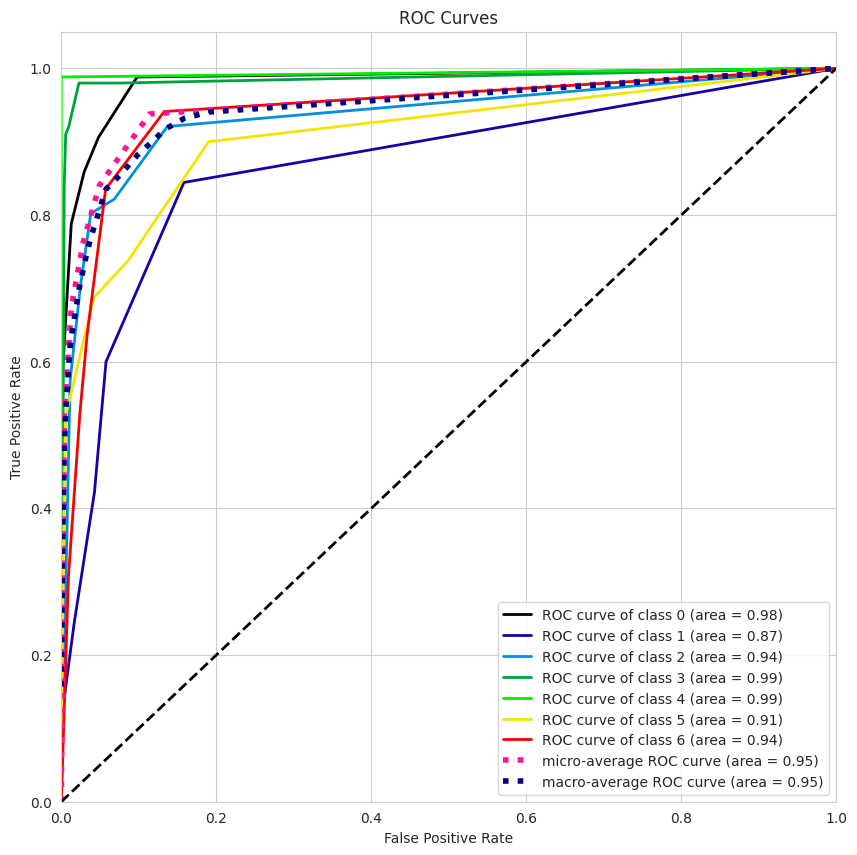

In [ ]:
plt.rcParams['figure.figsize'] = [10, 10]

predicted_probas = knn.predict_proba(X_test)
import matplotlib.pyplot as plt
import scikitplot as skplt
skplt.metrics.plot_roc(knn_expected, predicted_probas)

plt.show()

## Classification Report for KNN

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(knn_expected,knn_predicted))

              precision    recall  f1-score   support

           0       0.79      0.88      0.83        85
           1       0.60      0.49      0.54        90
           2       0.76      0.81      0.78       101
           3       0.91      0.94      0.93       100
           4       0.98      0.99      0.98        86
           5       0.66      0.70      0.68        80
           6       0.76      0.68      0.72        85

    accuracy                           0.79       627
   macro avg       0.78      0.78      0.78       627
weighted avg       0.78      0.79      0.78       627



## Classification Report for all the models

In [ ]:
from sklearn import metrics
print("Logistic Regression \n ", metrics.classification_report(LogR_expected,LogR_predicted))
print("Random Forest \n", metrics.classification_report(RF_expected,RF_predicted))
print("Decision Tree \n", metrics.classification_report(DC_expected,DC_predicted))
print("Support machine Vector \n", metrics.classification_report(svm_expected,svm_predicted))
print("K Nearest Nieghbour \n", metrics.classification_report(knn_expected,knn_predicted))

Logistic Regression 
                precision    recall  f1-score   support

           0       0.89      0.92      0.90        85
           1       0.82      0.73      0.78        90
           2       0.90      0.88      0.89       101
           3       0.92      0.96      0.94       100
           4       0.99      0.99      0.99        86
           5       0.73      0.84      0.78        80
           6       0.85      0.78      0.81        85

    accuracy                           0.87       627
   macro avg       0.87      0.87      0.87       627
weighted avg       0.87      0.87      0.87       627

Random Forest 
               precision    recall  f1-score   support

           0       0.98      0.95      0.96        85
           1       0.86      0.90      0.88        90
           2       0.96      0.95      0.96       101
           3       0.99      0.98      0.98       100
           4       0.99      1.00      0.99        86
           5       0.91      0.93      

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Classification Accuracy Report 

In [ ]:
print("Accuracy of Logistic Regression:", LR.score(X_test,y_test))
print("Accuracy of Random Forest:", RF.score(X_test,y_test))
print("Accuracy of Decision Tree:", DC.score(X_test,y_test))
print("Accuracy of Support Vector Machine:", svm.score(X_test,y_test))
print("Accuracy of K nearest neighbour:", knn.score(X_test,y_test))


Accuracy of Logistic Regression: 0.8724082934609251
Accuracy of Random Forest: 0.9473684210526315
Accuracy of Decision Tree: 0.6283891547049442
Accuracy of Support Vector Machine: 0.8835725677830941
Accuracy of K nearest neighbour: 0.7878787878787878
